In [600]:
import pandas as pd, numpy as np

In [601]:
from os import listdir
from os.path import isfile, join
mypath = 'C:\\Users\\Feflo\\Documents\\dane'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [602]:
csv = [k for k in onlyfiles if 'csv' in k]

In [603]:
for i in csv:
    print(i)
    globals()[i[0:i.index('.')]] = pd.read_csv(mypath+'\\'+i, encoding = 'latin', sep = ';')

dane2_medyczne.csv
pacjenci.csv
parametry_pacjentow.csv
procedury.csv
recepty.csv
rozpoznania.csv
swiadczenia.csv


C:\Python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [604]:
# liczba pacjentów u których wystąpił udar
len(pacjenci[pacjenci['CZY_UDAR']==True])

2971

In [605]:
#ile jest pacjentów wg tabeli pacjenci
len(pacjenci)

500000

In [606]:
# łączenie
# kodowanie zmiennych
# podział test train


# oversampling i undersampling

In [607]:
# zakodowanie binarne zmiennej objaśnianej
def bin(x):
    if x['CZY_UDAR']== False:
        return 0
    else:
        return 1
pacjenci['CZY_UDAR'] = pacjenci.apply(bin, axis=1)

In [608]:
# łączenie tabeli pacjenci z tabelą parametry_pacjentów
pacj_param = pd.merge(parametry_pacjentow, pacjenci, how='inner', on='ID_PACJENTA')

In [609]:
# wybieram pacjentów z województwa małopolskiego
pacj_param = pacj_param[(pacj_param['TERYT_POWIATU']>=1200) &(pacj_param['TERYT_POWIATU']<1300) ]

In [610]:
# rozdziela zmienne objaśniane od objaśniającej
y = pacj_param['CZY_UDAR']
X = pacj_param.drop(columns=['CZY_UDAR'])

In [611]:
#X[X['ID_PACJENTA']==455537].to_csv('pacjet_455537.csv')

In [612]:
# przed połączeniem z innymi tabelami dzieli na zbiór testowy i treningowy aby móc wykonać undersampling na treningowym
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.30,random_state=105)

In [613]:
# zmienia, nazwę
X = X_train
y = y_train

In [615]:
#algorytm dokonuje undersamplingu w taki sposób aby porporcja pacjentów z udarem była 1/2 pacjentów bez udaru
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=0.8, random_state=15)
X, y = under.fit_resample(X, y)

In [616]:
X['CZY_UDAR']=y

In [617]:
pacj_param = X

In [618]:
len(X)

369

In [83]:
#pokazuje proporcję osób z udarem do osób bez udaru
len(pacj_param[pacj_param['CZY_UDAR']==1])/len(pacj_param[pacj_param['CZY_UDAR']==0])

0.8

In [84]:
# łączy połączone wcześniej tabele z tabeląrecepty wg klucza ID_PACJENTA
pacj_parampacj_recepty = pd.merge( pacj_param, recepty, how='inner', on='ID_PACJENTA')

In [85]:
# łączy tabele powstałą we wcześniejszym wierszu z tabelą świadczenia wg klucza ID_PACJENTA
pacj_parampacj_recepty_swiad = pd.merge(swiadczenia, pacj_parampacj_recepty, how='inner', on='ID_PACJENTA')

In [86]:
# to co wyżej, łączy z tabelą procedury po ID_EPIZODDU
swiad_pacj_parampacj_recepty_procedury = pd.merge( pacj_parampacj_recepty_swiad, procedury, how='inner', on='ID_EPIZODU')

In [87]:
# to co wyżej tylko łączy z rozpoznaniami
swiad_pacj_parampacj_recepty_procedury_rozpoz = pd.merge( swiad_pacj_parampacj_recepty_procedury, rozpoznania, how='inner', on='ID_KONTAKTU')

In [88]:
# długą nazwę zamienia na df od dataframe
df = swiad_pacj_parampacj_recepty_procedury_rozpoz

In [89]:
df = df.drop_duplicates()

In [90]:
len(df[df['CZY_UDAR']==1])/ylen(df[df['CZY_UDAR']==0])

2.117133906140703

In [91]:
# oddziela zmienne
y = df['CZY_UDAR']
X = df.drop(columns=['CZY_UDAR'])

In [93]:
#len(y[y['CZY_UDAR']==1])/len(y[y['CZY_UDAR']==0])

In [100]:
len(X)

1778035

In [ ]:
# ZBIOR  TESTOWY

In [94]:
# przed połączeniem z innymi tabelami dzieli na zbiór testowy i treningowy aby móc wykonać undersampling na treningowym
from sklearn.model_selection import train_test_split
X_test_test, X_t, y_test_test, y_t = train_test_split(X_test, y_test,
                                                    stratify=y_test, 
                                                    test_size=0.02,random_state=105)

In [95]:
X_t['CZY_UDAR'] = y_t

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
# łączy na zbiorze testowym
X_test_recepty = pd.merge( X_t, recepty, how='inner', on='ID_PACJENTA')

In [97]:
X_test_recepty_swiad = pd.merge(swiadczenia, X_test_recepty, how='inner', on='ID_PACJENTA')
X_test_recepty_swiad_procedury = pd.merge( X_test_recepty_swiad, procedury, how='inner', on='ID_EPIZODU')
X_test_recepty_swiad_procedury_rozpoz = pd.merge( X_test_recepty_swiad_procedury, rozpoznania, how='inner', on='ID_KONTAKTU')

In [98]:
y_t = X_test_recepty_swiad_procedury_rozpoz['CZY_UDAR']
X_t = X_test_recepty_swiad_procedury_rozpoz.drop(columns='CZY_UDAR')

In [99]:
len(X_t)

854947

In [101]:
X_t.to_csv('X_testowy_v3.csv')

In [102]:
y_t.to_csv('y_testowy_v3.csv')

In [103]:
X.to_csv('X_treningowy_v3.csv')

In [104]:
y.to_csv('y_treningowy_v3.csv')

In [105]:
len(y_t[y_t==1])
#/len(y_t[y_t==0])

708

In [580]:
y = pd.read_csv('y_treningowy_v3.csv')
y_t = pd.read_csv('y_testowy_v3.csv')
X = pd.read_csv('X_treningowy_v3.csv')
X_t = pd.read_csv('X_testowy_v3.csv')

C:\Python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (12,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [582]:
y_t = y_t.drop(columns='Unnamed: 0')
y = y.drop(columns='Unnamed: 0')
X = X.drop(columns='Unnamed: 0')
X_t = X_t.drop(columns='Unnamed: 0')

KeyError: "['Unnamed: 0'] not found in axis"

In [599]:
len(X_t)
#[y_t['CZY_UDAR']==1])

854947

In [598]:
len(X_t)/len(y)

0.48083811623505723

In [588]:
len(y[y['CZY_UDAR']==1]) / len(y)#[y['CZY_UDAR']==0])

0.6791924793381457

In [24]:
pom_tab = pd.concat([X['ID_KONTAKTU'], X['ID_PACJENTA']], axis=1)
pom_tab = pom_tab.drop_duplicates()
pom_tab['count'] = pom_tab.groupby(['ID_PACJENTA'])['ID_KONTAKTU'].transform('count')
pom_tab['count_opposit'] = pom_tab.groupby(['ID_KONTAKTU'])['ID_PACJENTA'].transform('count')
pom_tab[pom_tab['count']>1]
pom_tab

,ID_KONTAKTU,ID_PACJENTA,count,count_opposit
0,39523973,557901,2,1
2160,82062627,557901,2,1
2178,86685743,291102,34,1
2186,43306080,291102,34,1
2194,69001959,291102,34,1
...,...,...,...,...
1777589,97463460,765667,18,1
1777913,12887313,765667,18,1
1777937,21618961,765667,18,1
1777943,96217125,765667,18,1


In [26]:
def tabela_pomocnicza(kol, klucz):
    pom_tab = pd.concat([X[klucz], X[kol]], axis=1)
    pom_tab = pom_tab.drop_duplicates()
    pom_tab['count'] = pom_tab.groupby([klucz])[kol].transform('count')
    pom_tab['count_opposit'] = pom_tab.groupby([kol])[klucz].transform('count')
    pom_tab[pom_tab['count']>1]
    return pom_tab

In [110]:
pom_tab = tabela_pomocnicza('ID_KONTAKTU','ID_PACJENTA')

In [111]:
pom_tab

,ID_PACJENTA,ID_KONTAKTU,count,count_opposit
0,557901,39523973,2,1
2160,557901,82062627,2,1
2178,291102,86685743,34,1
2186,291102,43306080,34,1
2194,291102,69001959,34,1
...,...,...,...,...
1777589,765667,97463460,18,1
1777913,765667,12887313,18,1
1777937,765667,21618961,18,1
1777943,765667,96217125,18,1


In [112]:
#zmienna ilość hospitalizacji na pacjenta
pom_tab['enumrate_pacjent_id_kontaktu'] = (pom_tab.groupby('ID_PACJENTA')['ID_KONTAKTU']
                                .transform(lambda x: pd.CategoricalIndex(x).codes))
pom_tab['enumrate_pacjent_id_kontaktu'] = pom_tab['enumrate_pacjent_id_kontaktu']+1

In [113]:
pom_tab[pom_tab['count']==pom_tab['count'].max()]#.to_csv('827660.csv')

,ID_PACJENTA,ID_KONTAKTU,count,count_opposit,enumrate_pacjent_id_kontaktu
1661621,827660,88037491,295,1,262
1661694,827660,32238845,295,1,94
1661767,827660,28428075,295,1,84
1661840,827660,25984322,295,1,77
1661913,827660,25416674,295,1,75
...,...,...,...,...,...
1703523,827660,26858013,295,1,80
1703596,827660,33706582,295,1,101
1703669,827660,16802209,295,1,35
1703742,827660,19354943,295,1,49


In [114]:
pom_tab['enumrate_pacjent_id_kontaktu']=pom_tab.enumrate_pacjent_id_kontaktu.astype('object') 

In [115]:
#podziaał na grupy po 20
pom_tab['enumrate_pacjent_id_kontaktu2'] = np.ceil(pom_tab.enumrate_pacjent_id_kontaktu/20.1)*20
pom_tab['enumrate_pacjent_id_kontaktu3'] = np.floor(pom_tab.enumrate_pacjent_id_kontaktu/20.1)*20
pom_tab['enumrate_pacjent_id_kontaktu4'] = '('+pom_tab.enumrate_pacjent_id_kontaktu3.astype('str') + ',' +pom_tab.enumrate_pacjent_id_kontaktu2.astype('str') +'>'

In [116]:
pom_tab

,ID_PACJENTA,ID_KONTAKTU,count,count_opposit,enumrate_pacjent_id_kontaktu,enumrate_pacjent_id_kontaktu2,enumrate_pacjent_id_kontaktu3,enumrate_pacjent_id_kontaktu4
0,557901,39523973,2,1,1,20,0,"(0,20>"
2160,557901,82062627,2,1,2,20,0,"(0,20>"
2178,291102,86685743,34,1,28,40,20,"(20,40>"
2186,291102,43306080,34,1,17,20,0,"(0,20>"
2194,291102,69001959,34,1,25,40,20,"(20,40>"
...,...,...,...,...,...,...,...,...
1777589,765667,97463460,18,1,18,20,0,"(0,20>"
1777913,765667,12887313,18,1,2,20,0,"(0,20>"
1777937,765667,21618961,18,1,4,20,0,"(0,20>"
1777943,765667,96217125,18,1,17,20,0,"(0,20>"


In [117]:
# powoduje, że jeżeli wartosc jest większa od 100 to wstawia 'Ponad 100'
def zmienna_enumerate(x):
    if int(x['enumrate_pacjent_id_kontaktu3']) <100:
        return x['enumrate_pacjent_id_kontaktu4']
    else: return 'Ponad 100'


In [118]:
pom_tab['enumrate_pacjent_id_kontaktu5'] = pom_tab.apply(zmienna_enumerate,axis=1)

In [30]:
import pandas as pd
from plotnine import *

%matplotlib inline

In [120]:
pom_tab = pom_tab.drop(['enumrate_pacjent_id_kontaktu4','enumrate_pacjent_id_kontaktu3','enumrate_pacjent_id_kontaktu2','enumrate_pacjent_id_kontaktu'], axis=1)

In [121]:
pom_tab.rename(columns={"enumrate_pacjent_id_kontaktu5": "Enumerate_pacjent_id_kontaktu"}, inplace = True)

In [122]:
pom_tab

,ID_PACJENTA,ID_KONTAKTU,count,count_opposit,Enumerate_pacjent_id_kontaktu
0,557901,39523973,2,1,"(0,20>"
2160,557901,82062627,2,1,"(0,20>"
2178,291102,86685743,34,1,"(20,40>"
2186,291102,43306080,34,1,"(0,20>"
2194,291102,69001959,34,1,"(20,40>"
...,...,...,...,...,...
1777589,765667,97463460,18,1,"(0,20>"
1777913,765667,12887313,18,1,"(0,20>"
1777937,765667,21618961,18,1,"(0,20>"
1777943,765667,96217125,18,1,"(0,20>"


In [27]:
#funkcja wykonuje wykres częstosci wybranej zmiennej
def wykres_czestosci(nazwa_zmien):
    return (ggplot(pom_tab, aes(nazwa_zmien, fill= nazwa_zmien, color= nazwa_zmien))
     + geom_bar()
     + geom_text(
        aes(label='stat(prop)*100', group=1),
        stat='count',
        nudge_y=0.125,
        va='bottom',
        format_string='{:.1f}%'
    )
    +ggtitle('Wykres częstości zmiennej '+nazwa_zmien)
    )
    

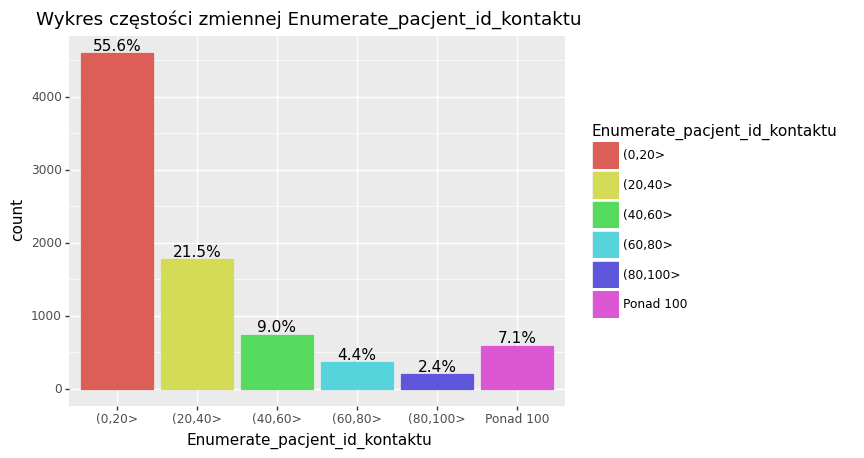

<ggplot: (130755907890)>

In [124]:
wykres_czestosci('Enumerate_pacjent_id_kontaktu')

In [125]:
#zmienna ilość hospitalizacji na pacjenta
X['enumrate_pacjent_id_kontaktu'] = (X.groupby('ID_PACJENTA')['ID_KONTAKTU']
                                .transform(lambda x: pd.CategoricalIndex(x).codes))
X['enumrate_pacjent_id_kontaktu'] = X['enumrate_pacjent_id_kontaktu']+1

X['enumrate_pacjent_id_kontaktu']=X.enumrate_pacjent_id_kontaktu.astype('object') 

#podziaał na grupy po 20
X['enumrate_pacjent_id_kontaktu2'] = np.ceil(X.enumrate_pacjent_id_kontaktu/20.1)*20
X['enumrate_pacjent_id_kontaktu3'] = np.floor(X.enumrate_pacjent_id_kontaktu/20.1)*20
X['enumrate_pacjent_id_kontaktu4'] = '('+X.enumrate_pacjent_id_kontaktu3.astype('str') + ',' +X.enumrate_pacjent_id_kontaktu2.astype('str') +'>'

X['enumrate_pacjent_id_kontaktu5'] = X.apply(zmienna_enumerate,axis=1)

X = X.drop(['enumrate_pacjent_id_kontaktu4','enumrate_pacjent_id_kontaktu3','enumrate_pacjent_id_kontaktu2','enumrate_pacjent_id_kontaktu'], axis=1)

X.rename(columns={"enumrate_pacjent_id_kontaktu5": "Enumerate_pacjent_id_kontaktu"}, inplace = True)

In [126]:
#zmienna ilość hospitalizacji na pacjenta
X_t['enumrate_pacjent_id_kontaktu'] = (X_t.groupby('ID_PACJENTA')['ID_KONTAKTU']
                                .transform(lambda x: pd.CategoricalIndex(x).codes))
X_t['enumrate_pacjent_id_kontaktu'] = X_t['enumrate_pacjent_id_kontaktu']+1

X_t['enumrate_pacjent_id_kontaktu']=X_t.enumrate_pacjent_id_kontaktu.astype('object') 

#podziaał na grupy po 20
X_t['enumrate_pacjent_id_kontaktu2'] = np.ceil(X_t.enumrate_pacjent_id_kontaktu/20.1)*20
X_t['enumrate_pacjent_id_kontaktu3'] = np.floor(X_t.enumrate_pacjent_id_kontaktu/20.1)*20
X_t['enumrate_pacjent_id_kontaktu4'] = '('+X_t.enumrate_pacjent_id_kontaktu3.astype('str') + ',' +X_t.enumrate_pacjent_id_kontaktu2.astype('str') +'>'

X_t['enumrate_pacjent_id_kontaktu5'] = X_t.apply(zmienna_enumerate,axis=1)

X_t = X_t.drop(['enumrate_pacjent_id_kontaktu4','enumrate_pacjent_id_kontaktu3','enumrate_pacjent_id_kontaktu2','enumrate_pacjent_id_kontaktu'], axis=1)

X_t.rename(columns={"enumrate_pacjent_id_kontaktu5": "Enumerate_pacjent_id_kontaktu"}, inplace = True)

In [127]:
# informacje o zmiennych objaśniających
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778035 entries, 0 to 1778034
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   ID_PACJENTA                    int64  
 1   ID_EPIZODU                     int64  
 2   ID_KONTAKTU                    int64  
 3   ID_KSIEGI_GLOWNEJ              float64
 4   ROK_SWIADCZENIA                int64  
 5   TYDZIEN_POCZATKU_KONTAKTU      int64  
 6   TYDZIEN_KONCA_KONTAKTU         float64
 7   KOD_ZAKRESU                    int64  
 8   KOD_PRODUKTU_JEDNOSTKOWEGO     object 
 9   TYP_KOMORKI                    int64  
 10  RODZAJ_SWIADCZEN               object 
 11  KWOTA_ROZLICZONA               object 
 12  GRUPA_WIEKOWA                  object 
 13  PLEC                           int64  
 14  TERYT_POWIATU                  float64
 15  ROK_WZGL                       float64
 16  TYDZIEN_UDARU                  float64
 17  ID_RECEPTY                     int64  
 18  RO

In [128]:
print(len(X.columns))
print(len(X_t.columns))

26
26


In [129]:
pom_tab = tabela_pomocnicza('ROK_SWIADCZENIA','ID_KONTAKTU')
pom_tab

,ID_KONTAKTU,ROK_SWIADCZENIA,count,count_opposit
0,39523973,-2,1,4177
2160,82062627,-2,1,4177
2178,86685743,-2,1,4177
2186,43306080,-2,1,4177
2194,69001959,-2,1,4177
...,...,...,...,...
1777589,97463460,-1,1,4091
1777913,12887313,-2,1,4177
1777937,21618961,-1,1,4091
1777943,96217125,-1,1,4091


In [130]:
pom_tab['ROK_SWIADCZENIA']=pom_tab.ROK_SWIADCZENIA.astype('object') 

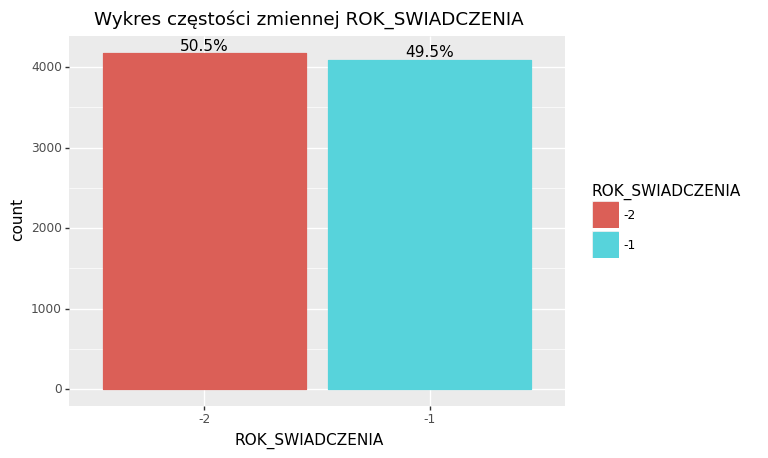

<ggplot: (130756055998)>

In [131]:
wykres_czestosci('ROK_SWIADCZENIA')

In [132]:
# zmiana oryginalnej zmiennej w całym zbiorze danych
X['ROK_SWIADCZENIA']=X.ROK_SWIADCZENIA.astype('object') 

In [133]:
X_t['ROK_SWIADCZENIA']=X_t.ROK_SWIADCZENIA.astype('object') 

In [134]:
import math
import matplotlib.pyplot as plt 

In [135]:
pom_tab = tabela_pomocnicza('TYDZIEN_POCZATKU_KONTAKTU','ID_KONTAKTU')

In [136]:
def histogram(zmienna):
    max_=pom_tab['count_opposit'].max()
    mean_=pom_tab[zmienna].mean()
    nbins=53
    plt.hist(pom_tab[zmienna],nbins, facecolor='#79edde', alpha=0.75,ec="k")
    plt.xlabel(zmienna)
    plt.ylabel('Czestość')
    plt.title('Histogram zmiennej '+zmienna)
    #plt.text(round(mean_,2)+round(mean_,2)*0.02,max_-max_*0.05, 'średia = \n'+ str(round(mean_,2)), color='r')
    plt.axis([0, 54, 0, max_+max_*0.1])
    plt.grid(True)
    #plt.plot( [mean_,mean_],[0,max_+max_*0.1], 'k-', lw=2, ls = '--', color='r')
    plt.savefig(zmienna+'_histogram.png', dpi=250, optimize=False,pad_inches=0.1, bbox_inches = "tight")
    plt.show()
    return plt

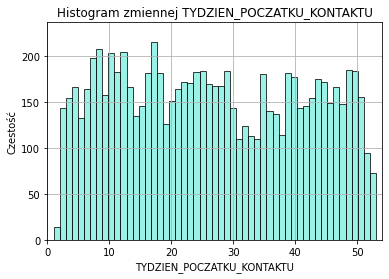

<module 'matplotlib.pyplot' from 'C:\\Users\\Feflo\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

In [137]:
histogram('TYDZIEN_POCZATKU_KONTAKTU')

In [138]:
pom_tab = tabela_pomocnicza('TYDZIEN_KONCA_KONTAKTU','ID_KONTAKTU')

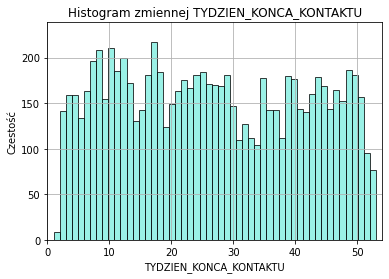

<module 'matplotlib.pyplot' from 'C:\\Users\\Feflo\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

In [139]:
histogram('TYDZIEN_KONCA_KONTAKTU')

In [140]:
pom_tab = pd.concat([X['TYDZIEN_POCZATKU_KONTAKTU'],X['TYDZIEN_KONCA_KONTAKTU'], X['ID_KONTAKTU']], axis=1)
pom_tab = pom_tab.drop_duplicates()

In [141]:
def dlugosc_kontaktu(x):
    if x['TYDZIEN_POCZATKU_KONTAKTU']<= x['TYDZIEN_KONCA_KONTAKTU']:
        return x['TYDZIEN_KONCA_KONTAKTU'] - x['TYDZIEN_POCZATKU_KONTAKTU']
    else:
        return (53-x['TYDZIEN_POCZATKU_KONTAKTU'])+x['TYDZIEN_KONCA_KONTAKTU']

pom_tab['DLUGOSC_KONTAKTU'] = pom_tab.apply(dlugosc_kontaktu, axis=1)

In [142]:
pom_tab['count'] = pom_tab.groupby(['ID_KONTAKTU'])['DLUGOSC_KONTAKTU'].transform('count')
pom_tab['count_opposit'] = pom_tab.groupby(['DLUGOSC_KONTAKTU'])['ID_KONTAKTU'].transform('count')
pom_tab[pom_tab['count']>1]

,TYDZIEN_POCZATKU_KONTAKTU,TYDZIEN_KONCA_KONTAKTU,ID_KONTAKTU,DLUGOSC_KONTAKTU,count,count_opposit


In [143]:
max_=pom_tab['count_opposit'].max()
mean_=pom_tab['DLUGOSC_KONTAKTU'].mean()

In [144]:
max_dl=pom_tab['DLUGOSC_KONTAKTU'].max()

In [145]:
np.unique(pom_tab['DLUGOSC_KONTAKTU'])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  9., 14.])

In [146]:
pom_tab[pom_tab['DLUGOSC_KONTAKTU']==53]

,TYDZIEN_POCZATKU_KONTAKTU,TYDZIEN_KONCA_KONTAKTU,ID_KONTAKTU,DLUGOSC_KONTAKTU,count,count_opposit


In [147]:
pom_tab['DLUGOSC_KONTAKTU']=pom_tab.DLUGOSC_KONTAKTU.astype('object') 

In [148]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1778035 entries, 0 to 1778034
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   ID_PACJENTA                    int64  
 1   ID_EPIZODU                     int64  
 2   ID_KONTAKTU                    int64  
 3   ID_KSIEGI_GLOWNEJ              float64
 4   ROK_SWIADCZENIA                object 
 5   TYDZIEN_POCZATKU_KONTAKTU      int64  
 6   TYDZIEN_KONCA_KONTAKTU         float64
 7   KOD_ZAKRESU                    int64  
 8   KOD_PRODUKTU_JEDNOSTKOWEGO     object 
 9   TYP_KOMORKI                    int64  
 10  RODZAJ_SWIADCZEN               object 
 11  KWOTA_ROZLICZONA               object 
 12  GRUPA_WIEKOWA                  object 
 13  PLEC                           int64  
 14  TERYT_POWIATU                  float64
 15  ROK_WZGL                       float64
 16  TYDZIEN_UDARU                  float64
 17  ID_RECEPTY                     int64  
 18  RO

In [149]:
# ilość unikatowych wartości zmiennej KOD_ZAKRESU
len(np.unique(X.KOD_ZAKRESU) )

147

In [150]:
pom_tab = tabela_pomocnicza('KOD_ZAKRESU','ID_KONTAKTU')

In [151]:
# zmiana typu zmiennej na string
pom_tab['KOD_ZAKRESU'] = pom_tab['KOD_ZAKRESU'].astype('str') 

In [152]:
# 15 najliczniejszych kategori do pogrupowania
ls_kod_zakr = list(pom_tab[['KOD_ZAKRESU','count_opposit']].drop_duplicates().nlargest(15, 'count_opposit')['KOD_ZAKRESU'])

In [153]:
#grupowanie
def kod_zakresu(x):
    if x['KOD_ZAKRESU'] in ls_kod_zakr:
        return x['KOD_ZAKRESU']
    else: return 'OTHER'

In [154]:
pom_tab['KOD_ZAKRESU_TOP_15_KAT']= pom_tab.apply(kod_zakresu, axis=1)

In [155]:
#zmiana typu zmiennej na object
pom_tab['KOD_ZAKRESU'] = pom_tab['KOD_ZAKRESU_TOP_15_KAT'].astype('object') 

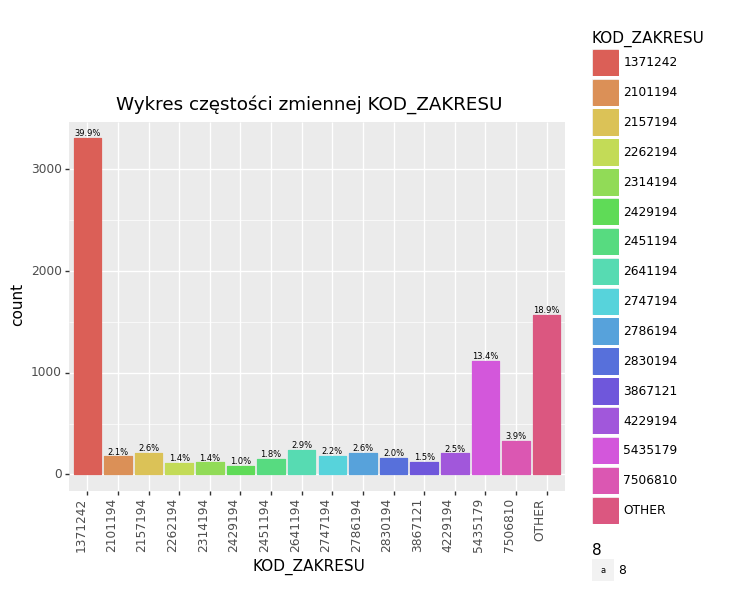

<ggplot: (-9223371905909832967)>

In [156]:
#zmieniony wykres, mniejsza czcionka, opisy kategorii obrócone
(ggplot(pom_tab, aes('KOD_ZAKRESU',fill='KOD_ZAKRESU', color = 'KOD_ZAKRESU'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1, size=8),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
 +theme(axis_text_x=element_text(rotation=90, hjust=1))
 +ggtitle('Wykres częstości zmiennej KOD_ZAKRESU')
)

In [157]:
X['KOD_ZAKRESU'] = X['KOD_ZAKRESU'].astype('str') 

X['KOD_ZAKRESU_TOP_15_KAT']= X.apply(kod_zakresu, axis=1)

X['KOD_ZAKRESU'] = X['KOD_ZAKRESU_TOP_15_KAT'].astype('object') 

X = X.drop(['KOD_ZAKRESU_TOP_15_KAT'], axis=1)

In [158]:
np.unique(X.KOD_ZAKRESU)

array(['1371242', '2101194', '2157194', '2262194', '2314194', '2429194',
       '2451194', '2641194', '2747194', '2786194', '2830194', '3867121',
       '4229194', '5435179', '7506810', 'OTHER'], dtype=object)

In [159]:
# na testowym to samo co treningowym
X_t['KOD_ZAKRESU'] = X_t['KOD_ZAKRESU'].astype('str') 

X_t['KOD_ZAKRESU_TOP_15_KAT']= X_t.apply(kod_zakresu, axis=1)

X_t['KOD_ZAKRESU'] = X_t['KOD_ZAKRESU_TOP_15_KAT'].astype('object') 

X_t = X_t.drop(['KOD_ZAKRESU_TOP_15_KAT'], axis=1)

In [160]:
np.unique(X_t.KOD_ZAKRESU) # do testowego dodać zmienna dummy 111026019 z samymi zerami

array(['1371242', '2101194', '2157194', '2262194', '2314194', '2429194',
       '2451194', '2641194', '2747194', '2786194', '2830194', '3867121',
       '4229194', '5435179', '7506810', 'OTHER'], dtype=object)

In [161]:
# ilość poziomów zmiennej 
len(np.unique(X.KOD_PRODUKTU_JEDNOSTKOWEGO )) # 476 unikalnych wartości

418

In [162]:
pom_tab = tabela_pomocnicza('KOD_PRODUKTU_JEDNOSTKOWEGO','ID_KONTAKTU')

In [163]:
pom_tab['KOD_PRODUKTU_JEDNOSTKOWEGO'] = pom_tab['KOD_PRODUKTU_JEDNOSTKOWEGO'].astype('str') 

In [164]:
len(np.unique(pom_tab['KOD_PRODUKTU_JEDNOSTKOWEGO']))

418

In [165]:
# pierwsza część kodu jednostkowego
pom_tab['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE'] = pom_tab['KOD_PRODUKTU_JEDNOSTKOWEGO'].str[:7]

In [166]:
pom_tab['count'] = pom_tab.groupby(['ID_KONTAKTU'])['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE'].transform('count')
pom_tab['count_opposit'] = pom_tab.groupby(['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE'])['ID_KONTAKTU'].transform('count')
pom_tab[pom_tab['count']>1]

,ID_KONTAKTU,KOD_PRODUKTU_JEDNOSTKOWEGO,count,count_opposit,KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE
0,39523973,5.09.01.0030742,18,596,5.09.01
120,39523973,5.09.01.0030675,18,596,5.09.01
240,39523973,5.09.01.0030577,18,596,5.09.01
360,39523973,5.09.01.0030947,18,596,5.09.01
480,39523973,5.09.01.0030701,18,596,5.09.01
...,...,...,...,...,...
1777125,53139440,5.13.00.0060669,2,698,5.13.00
1777325,22198628,5.09.01.0030527,2,596,5.09.01
1777337,22198628,5.09.02.0030067,2,395,5.09.02
1777589,97463460,5.15.12.0030162,2,238,5.15.12


In [167]:
len(np.unique(pom_tab['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE'] ))

30

In [168]:
ls_kod_prod_jedn = list(pom_tab[['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE','count_opposit']].drop_duplicates().nlargest(15, 'count_opposit')['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE'])

In [169]:
ls_kod_prod_jedn

['5.01.00',
 '5.30.00',
 '5.11.01',
 '5.13.00',
 '5.09.01',
 '5.09.02',
 '5.31.00',
 '5.15.12',
 '5.51.01',
 '5.01.28',
 '5.14.00',
 '5.03.00',
 '5.11.00',
 '5.09.03',
 '5.10.00']

In [170]:
def kod_prod_jedn(x):
    if x['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE'] in ls_kod_prod_jedn:
        return x['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE']
    else: return 'OTHER'

In [171]:
pom_tab['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE_15_top']= pom_tab.apply(kod_prod_jedn, axis=1)

In [172]:
pom_tab['KOD_PRODUKTU_JEDNOSTKOWEGO'] = pom_tab['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE_15_top'].astype('object') 

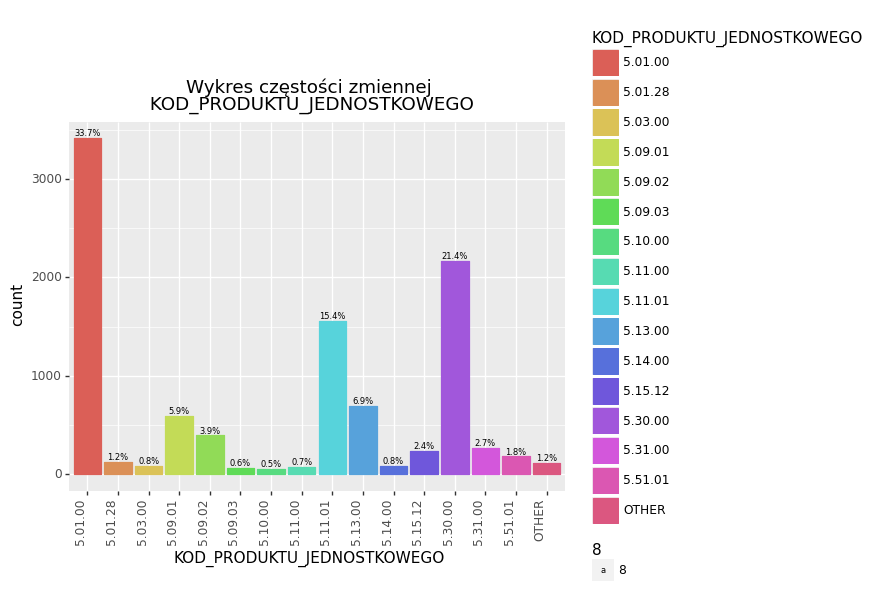

<ggplot: (131069498870)>

In [173]:
(ggplot(pom_tab, aes('KOD_PRODUKTU_JEDNOSTKOWEGO',fill='KOD_PRODUKTU_JEDNOSTKOWEGO', color = 'KOD_PRODUKTU_JEDNOSTKOWEGO'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1, size=8),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
 +theme(axis_text_x=element_text(rotation=90, hjust=1))
 +ggtitle('Wykres częstości zmiennej\n KOD_PRODUKTU_JEDNOSTKOWEGO')
)

In [174]:
X['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE'] = X['KOD_PRODUKTU_JEDNOSTKOWEGO'].str[:7]

X['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE_15_top']= X.apply(kod_prod_jedn, axis=1)

X['KOD_PRODUKTU_JEDNOSTKOWEGO'] = X['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE_15_top'].astype('object') 

X = X.drop(['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE', 'KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE_15_top'], axis=1)

In [175]:
np.unique(X['KOD_PRODUKTU_JEDNOSTKOWEGO'])

array(['5.01.00', '5.01.28', '5.03.00', '5.09.01', '5.09.02', '5.09.03',
       '5.10.00', '5.11.00', '5.11.01', '5.13.00', '5.14.00', '5.15.12',
       '5.30.00', '5.31.00', '5.51.01', 'OTHER'], dtype=object)

In [176]:
# to samo na testowych

X_t['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE'] = X_t['KOD_PRODUKTU_JEDNOSTKOWEGO'].str[:7]

X_t['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE_15_top']= X_t.apply(kod_prod_jedn, axis=1)

X_t['KOD_PRODUKTU_JEDNOSTKOWEGO'] = X_t['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE_15_top'].astype('object') 

X_t = X_t.drop(['KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE', 'KOD_PRODUKTU_JEDNOSTKOWEGO_GLOWNE_15_top'], axis=1)

In [177]:
np.unique(X_t['KOD_PRODUKTU_JEDNOSTKOWEGO'])

array(['5.01.00', '5.01.28', '5.03.00', '5.09.01', '5.09.02', '5.09.03',
       '5.10.00', '5.11.00', '5.11.01', '5.13.00', '5.14.00', '5.15.12',
       '5.30.00', '5.31.00', '5.51.01', 'OTHER'], dtype=object)

In [178]:
# wykres częstości zmienne typ_komorki

In [179]:
X.TYP_KOMORKI=X.TYP_KOMORKI.astype('object') 

In [180]:
X_t.TYP_KOMORKI=X_t.TYP_KOMORKI.astype('object') 

In [181]:
pom_tab = tabela_pomocnicza('TYP_KOMORKI','ID_KONTAKTU')
pom_tab

,ID_KONTAKTU,TYP_KOMORKI,count,count_opposit
0,39523973,4902,1,125
2160,82062627,3112,1,58
2178,86685743,3010,1,51
2186,43306080,3010,1,51
2194,69001959,10,1,2901
...,...,...,...,...
1777589,97463460,4700,1,8
1777913,12887313,3112,1,58
1777937,21618961,3112,1,58
1777943,96217125,3114,1,28


In [182]:
ls_typ_kom = list(pom_tab[['TYP_KOMORKI','count_opposit']].drop_duplicates().nlargest(10, 'count_opposit')['TYP_KOMORKI'])

In [183]:
pom_tab['TYP_KOMORKI'] = pom_tab['TYP_KOMORKI'].astype('str') 

In [184]:
ls_typ_kom

[10, 1310, 12, 1800, 1580, 1100, 1500, 1600, 1700, 1220]

In [185]:
def typ_komorki(x):
    if int(x['TYP_KOMORKI']) in ls_typ_kom:
        return x['TYP_KOMORKI']
    else: return 'OTHER'
pom_tab['TYP_KOMORKI_TOP10_KAT']= pom_tab.apply(typ_komorki, axis=1)

In [186]:
pom_tab['TYP_KOMORKI'] = pom_tab['TYP_KOMORKI_TOP10_KAT'].astype('object') 

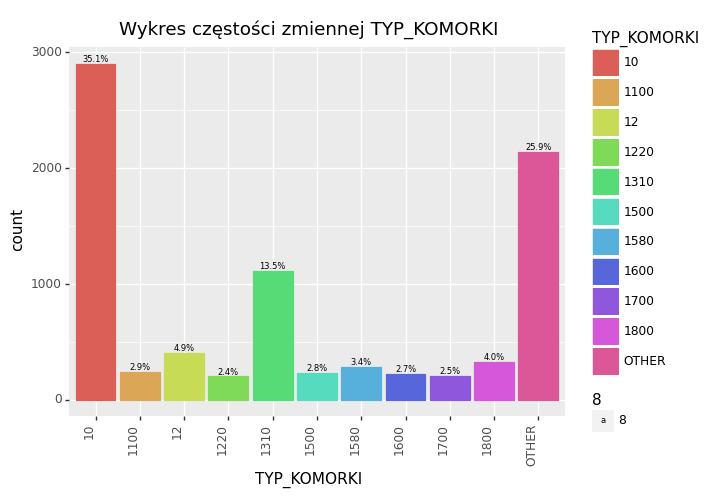

<ggplot: (130944980912)>

In [187]:
(ggplot(pom_tab, aes('TYP_KOMORKI',fill='TYP_KOMORKI', color = 'TYP_KOMORKI'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1, size=8),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
 +theme(axis_text_x=element_text(rotation=90, hjust=1))
 +ggtitle('Wykres częstości zmiennej TYP_KOMORKI')
)

In [188]:
X['TYP_KOMORKI'] = X['TYP_KOMORKI'].astype('str') 

X['TYP_KOMORKI_TOP10_KAT']= X.apply(typ_komorki, axis=1)

X['TYP_KOMORKI'] = X['TYP_KOMORKI_TOP10_KAT'].astype('object') 

X = X.drop(['TYP_KOMORKI_TOP10_KAT'], axis=1)

In [189]:
# na testowym
X_t['TYP_KOMORKI'] = X_t['TYP_KOMORKI'].astype('str') 

X_t['TYP_KOMORKI_TOP10_KAT']= X_t.apply(typ_komorki, axis=1)

X_t['TYP_KOMORKI'] = X_t['TYP_KOMORKI_TOP10_KAT'].astype('object') 

X_t = X_t.drop(['TYP_KOMORKI_TOP10_KAT'], axis=1)

In [190]:
np.unique(X_t['TYP_KOMORKI'])

array(['10', '1100', '12', '1220', '1310', '1500', '1580', '1600', '1700',
       '1800', 'OTHER'], dtype=object)

In [191]:
np.unique(X['TYP_KOMORKI'])

array(['10', '1100', '12', '1220', '1310', '1500', '1580', '1600', '1700',
       '1800', 'OTHER'], dtype=object)

In [192]:
# słownik do numerowania rodzajów świadczeń
d = dict(zip(list(np.unique(X.RODZAJ_SWIADCZEN )), list(range(1,12))))

In [193]:
d # poprawic , że 11 poziomów w tekście

{'AMBULATORYJNE \x8cWIADCZENIA SPECJALISTYCZNE': 1,
 'LECZENIE STOMATOLOGICZNE': 2,
 'LECZENIE SZPITALNE': 3,
 'OPIEKA PSYCHIATRYCZNA I LECZENIE UZALE¯NIEÑ': 4,
 'PODSTAWOWA OPIEKA ZDROWOTNA': 5,
 'PROFILAKTYCZNE PROGRAMY ZDROWOTNE': 6,
 'RATOWNICTWO MEDYCZNE': 7,
 'REHABILITACJA LECZNICZA': 8,
 '\x8cWIADCZENIA ODRÊBNIE KONTRAKTOWANE': 9}

In [194]:
# zmiana formy opisowej zmiennej na numeryczną

X['RODZAJ_SWIADCZEN'] = X.apply( lambda x: d[x['RODZAJ_SWIADCZEN']], axis=1)

In [195]:
X.RODZAJ_SWIADCZEN=X.RODZAJ_SWIADCZEN.astype('object')

In [196]:
# na testowym
d = dict(zip(list(np.unique(X_t.RODZAJ_SWIADCZEN )), list(range(1,11))))
X_t['RODZAJ_SWIADCZEN'] = X_t.apply( lambda x: d[x['RODZAJ_SWIADCZEN']], axis=1)

X_t.RODZAJ_SWIADCZEN=X_t.RODZAJ_SWIADCZEN.astype('object')

In [197]:
np.unique(X['RODZAJ_SWIADCZEN'])

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=object)

In [198]:
np.unique(X_t['RODZAJ_SWIADCZEN']) 

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=object)

In [199]:
pom_tab = tabela_pomocnicza('RODZAJ_SWIADCZEN','ID_KONTAKTU')
pom_tab

,ID_KONTAKTU,RODZAJ_SWIADCZEN,count,count_opposit
0,39523973,3,1,371
2160,82062627,7,1,86
2178,86685743,5,1,3413
2186,43306080,5,1,3413
2194,69001959,5,1,3413
...,...,...,...,...
1777589,97463460,4,1,233
1777913,12887313,7,1,86
1777937,21618961,7,1,86
1777943,96217125,7,1,86


In [200]:
pom_tab = pd.concat([X['RODZAJ_SWIADCZEN'], X['ID_KONTAKTU']], axis=1)
pom_tab = pom_tab.drop_duplicates()
pom_tab['count'] = pom_tab.groupby(['ID_KONTAKTU'])['RODZAJ_SWIADCZEN'].transform('count')
pom_tab['count_opposit'] = pom_tab.groupby(['RODZAJ_SWIADCZEN'])['ID_KONTAKTU'].transform('count')
pom_tab[pom_tab['count']>1]
pom_tab

,RODZAJ_SWIADCZEN,ID_KONTAKTU,count,count_opposit
0,3,39523973,1,371
2160,7,82062627,1,86
2178,5,86685743,1,3413
2186,5,43306080,1,3413
2194,5,69001959,1,3413
...,...,...,...,...
1777589,4,97463460,1,233
1777913,7,12887313,1,86
1777937,7,21618961,1,86
1777943,7,96217125,1,86


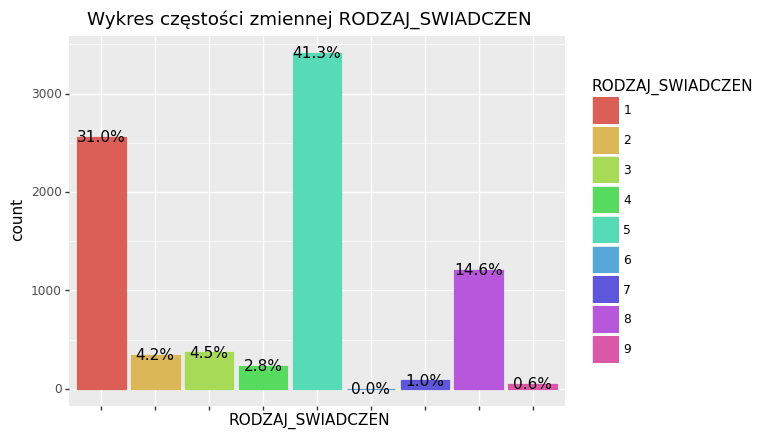

<ggplot: (-9223371905741874365)>

In [201]:
(ggplot(pom_tab, aes('RODZAJ_SWIADCZEN',fill='RODZAJ_SWIADCZEN', color = 'RODZAJ_SWIADCZEN'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     #va='bottom',
     format_string='{:.1f}%'
 )
 +theme(axis_text_x=element_blank())
 +ggtitle('Wykres częstości zmiennej RODZAJ_SWIADCZEN')
)

In [40]:
def przecinek(x):
    if (type(x) == str) :
        try:
            x = x.replace(',','.')
        except:
            return float(x)
    return float(x)

In [203]:
X.columns

Index(['ID_PACJENTA', 'ID_EPIZODU', 'ID_KONTAKTU', 'ID_KSIEGI_GLOWNEJ',
       'ROK_SWIADCZENIA', 'TYDZIEN_POCZATKU_KONTAKTU',
       'TYDZIEN_KONCA_KONTAKTU', 'KOD_ZAKRESU', 'KOD_PRODUKTU_JEDNOSTKOWEGO',
       'TYP_KOMORKI', 'RODZAJ_SWIADCZEN', 'KWOTA_ROZLICZONA', 'GRUPA_WIEKOWA',
       'PLEC', 'TERYT_POWIATU', 'ROK_WZGL', 'TYDZIEN_UDARU', 'ID_RECEPTY',
       'ROK_REALIZACJI_RECEPTY', 'TYDZIEN_POCZATKU_REALIZACJI', 'KOD_ATC',
       'LICZBA_OPAKOWAN', 'KOD_PROCEDURY', 'KOD_ROZPOZNANIA', 'CZY_GLOWNA',
       'Enumerate_pacjent_id_kontaktu'],
      dtype='object')

In [204]:
X['KWOTA_ROZLICZONA'] = X['KWOTA_ROZLICZONA'].apply(przecinek)

In [205]:
# na testowym
X_t['KWOTA_ROZLICZONA'] = X_t['KWOTA_ROZLICZONA'].apply(przecinek)

In [206]:
X.KWOTA_ROZLICZONA.mean()

618.8483385602082

In [207]:
X.KWOTA_ROZLICZONA

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
            ...  
1778030    2912.0
1778031    2912.0
1778032    2912.0
1778033    2912.0
1778034    2912.0
Name: KWOTA_ROZLICZONA, Length: 1778035, dtype: float64

In [208]:
# ZMIENNA KWOTA_ROZLICZONA

In [209]:
pom_tab = tabela_pomocnicza('KWOTA_ROZLICZONA','ID_KONTAKTU')
pom_tab

,ID_KONTAKTU,KWOTA_ROZLICZONA,count,count_opposit
0,39523973,0.0,1,3859
2160,82062627,0.0,1,3859
2178,86685743,0.0,1,3859
2186,43306080,0.0,1,3859
2194,69001959,0.0,1,3859
...,...,...,...,...
1777805,97463460,115.5,3,3
1777913,12887313,0.0,1,3859
1777937,21618961,0.0,1,3859
1777943,96217125,0.0,1,3859


In [210]:
pom_tab['KWOTA_ROZLICZONA_LOG']= pom_tab['KWOTA_ROZLICZONA'].apply(lambda x: np.log((x+ 1) - min(pom_tab['KWOTA_ROZLICZONA'])))

In [211]:
# pokazanie, że tylko 390 najwyższych wartości zmienej jest powyżej 500
pom_tab.nlargest(390, 'KWOTA_ROZLICZONA')

,ID_KONTAKTU,KWOTA_ROZLICZONA,count,count_opposit,KWOTA_ROZLICZONA_LOG
1595985,66705442,32500.0,1,1,10.389026
1743178,4392417,22048.0,2,1,10.001023
383572,87803629,22026.8,1,1,10.000061
994363,56576113,19916.0,2,2,9.899329
1131188,89338162,19916.0,1,2,9.899329
...,...,...,...,...,...
1390826,68825884,341.0,1,26,5.834811
1390982,97942969,341.0,1,26,5.834811
1103824,21869506,340.0,2,1,5.831882
235418,86271780,337.5,3,2,5.824524


In [212]:
pom_tab.nlargest(10, 'count_opposit')

,ID_KONTAKTU,KWOTA_ROZLICZONA,count,count_opposit,KWOTA_ROZLICZONA_LOG
0,39523973,0.0,1,3859,0.0
2160,82062627,0.0,1,3859,0.0
2178,86685743,0.0,1,3859,0.0
2186,43306080,0.0,1,3859,0.0
2194,69001959,0.0,1,3859,0.0
2202,2974061,0.0,1,3859,0.0
2210,4003591,0.0,1,3859,0.0
2218,99129058,0.0,1,3859,0.0
2226,66120767,0.0,1,3859,0.0
2234,8345678,0.0,1,3859,0.0


In [213]:
pom_tab['count_opposit'] = pom_tab.groupby(['KWOTA_ROZLICZONA'])['KWOTA_ROZLICZONA'].transform('count')

In [214]:
# obliczenie, że 390 wartości to tylko 3.5% wszystkich
390/len(pom_tab)

0.04259036802446216

In [215]:
# minimalna wartość ze zmiennej
pom_tab['KWOTA_ROZLICZONA'].min()

0.0

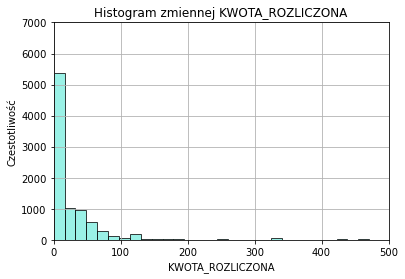

In [216]:
# the histogram of the data
sr = pom_tab['KWOTA_ROZLICZONA'].mean()
nbins=2000
plt.hist(pom_tab['KWOTA_ROZLICZONA'],nbins, facecolor='#79edde', alpha=0.75,ec="k")
plt.xlabel('KWOTA_ROZLICZONA')
plt.ylabel('Czestotliwość')
plt.title('Histogram zmiennej KWOTA_ROZLICZONA')
#plt.text(round(sr,2)+50, 9000-2500, 'średia = \n'+ str(round(sr,2)), color='r')
plt.axis([0, 500, 0, 7000])
plt.grid(True)
#plt.plot([sr,sr], [0,20000], 'k-', lw=2, ls = '--', color='r')

plt.savefig('KWOTA_ROZLICZONA_histogram.png', dpi=250, optimize=False,pad_inches=0.1, bbox_inches = "tight")
plt.show()

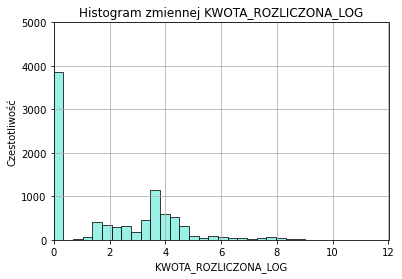

In [217]:
# the histogram of the data
sr = pom_tab['KWOTA_ROZLICZONA_LOG'].mean()
nbins=30
plt.hist(pom_tab['KWOTA_ROZLICZONA_LOG'],nbins, facecolor='#79edde', alpha=0.75,ec="k")
plt.xlabel('KWOTA_ROZLICZONA_LOG')
plt.ylabel('Czestotliwość')
plt.title('Histogram zmiennej KWOTA_ROZLICZONA_LOG')
#plt.text(round(sr,2)+50, 9000-2500, 'średia = \n'+ str(round(sr,2)), color='r')
plt.axis([0, 12, 0, 5000])
plt.grid(True)
#plt.plot([sr,sr], [0,20000], 'k-', lw=2, ls = '--', color='r')

plt.savefig('KWOTA_ROZLICZONA_LOG_histogram.png', dpi=250, optimize=False,pad_inches=0.1, bbox_inches = "tight")
plt.show()

In [218]:
len(pom_tab['KWOTA_ROZLICZONA'])

9157

In [219]:
# jakby co można się pokusić o box cox transformacje dodając do zmiennej jakąś wartosć

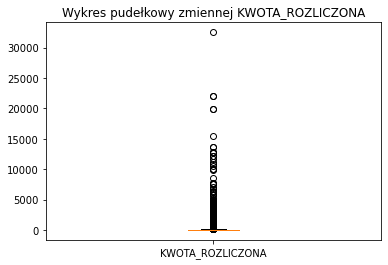

In [220]:
# wykres pudełkowy
plt.boxplot(pom_tab['KWOTA_ROZLICZONA'],labels=['KWOTA_ROZLICZONA'],whis=3)
plt.title('Wykres pudełkowy zmiennej KWOTA_ROZLICZONA')
plt.show()

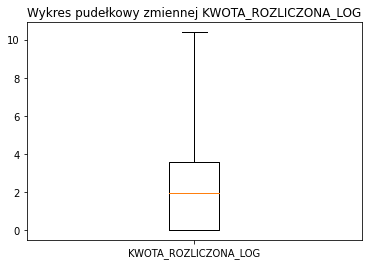

In [221]:
# wykres pudełkowy
plt.boxplot(pom_tab['KWOTA_ROZLICZONA_LOG'],labels=['KWOTA_ROZLICZONA_LOG'],whis=3)
plt.title('Wykres pudełkowy zmiennej KWOTA_ROZLICZONA_LOG')
plt.show()

In [222]:
min_kwota_rozl = np.min(X['KWOTA_ROZLICZONA'])
X['KWOTA_ROZLICZONA_LOG']= X['KWOTA_ROZLICZONA'].apply(lambda x: np.log((x+ 1) - min_kwota_rozl))#min(X['KWOTA_ROZLICZONA'])))

X.drop('KWOTA_ROZLICZONA', axis=1, inplace=True)

In [223]:
# na testowy

min_kwota_rozl = np.min(X_t['KWOTA_ROZLICZONA'])
X_t['KWOTA_ROZLICZONA_LOG']= X_t['KWOTA_ROZLICZONA'].apply(lambda x: np.log((x+ 1) - min_kwota_rozl))#min(X['KWOTA_ROZLICZONA'])))

X_t.drop('KWOTA_ROZLICZONA', axis=1, inplace=True)

In [224]:
# zmienna grupa_wiekowa

In [225]:
q1, q3= np.percentile(pom_tab['KWOTA_ROZLICZONA_LOG'],[25,75])
iqr = q3 - q1
upper_bound = q3 +(1.5 * iqr) 

In [226]:
upper_bound

8.939276890020745

In [227]:
import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [228]:
detect_outlier(pom_tab['KWOTA_ROZLICZONA_LOG'])

[8.738895704934043,
 8.576405051048084,
 8.50532301884575,
 8.50532301884575,
 8.370315995555478,
 9.219201000408379,
 8.696343057044556,
 9.219201000408379,
 9.648014489106362,
 8.651898894268529,
 10.000060570987605,
 8.817964228409735,
 9.298442820197728,
 8.738895704934043,
 9.057305735807121,
 9.4066470133368,
 8.738895704934043,
 9.4066470133368,
 9.899328917387269,
 8.44009614103127,
 8.428799040653642,
 8.658857670645943,
 9.899328917387269,
 9.45258041898138,
 9.527265662897605,
 9.317309592973425,
 9.527265662897605,
 8.941807118363164,
 8.73052880173936,
 9.358501722956703,
 8.394121193826242,
 9.203617826215355,
 9.461176908307142,
 9.268703615273097,
 8.925587339030281,
 8.958372873348395,
 8.856603963452967,
 10.389026137075234,
 8.536407410340042,
 8.756732789901994,
 10.00102252837266,
 8.35819745992578,
 8.39511594883683,
 8.408906175508566,
 8.408708021328588,
 8.418053287571468,
 8.418053287571468,
 8.418053287571468,
 8.408708021328588,
 8.366951528085695,
 8.394121

In [229]:
# pokazanie unikatowych wartości
np.unique(X.GRUPA_WIEKOWA )

array(['(23,28]', '(28,33]', '(33,38]', '(38,43]', '(43,48]', '(48,53]',
       '(53,58]', '(58,63]', '(63,68]', '(68,73]', '(73,78]', '(78,83]',
       '(83,88]', '(88,93]', '(93,98]', '(98,103]', '[18,23]'],
      dtype=object)

In [230]:
# tworzy tabele ze zmienną oraz zmienną- klucz ID_PACJENTA
pom_tab = tabela_pomocnicza('GRUPA_WIEKOWA','ID_PACJENTA')
pom_tab

,ID_PACJENTA,GRUPA_WIEKOWA,count,count_opposit
0,557901,"(88,93]",1,16
2178,291102,"(63,68]",1,38
2866,813276,"(73,78]",1,22
109516,932334,"(23,28]",1,20
109517,56837,"(78,83]",1,37
...,...,...,...,...
1776697,603738,"(78,83]",1,37
1776739,754358,"(23,28]",1,20
1776775,766343,"(73,78]",1,22
1777325,765667,"(33,38]",1,14


In [231]:
# ze względdu na niską liczność grupo łączy trzy ostatnie poziomy w jeden
def laczenie_3_ostatnich_grup(x):
    if x['GRUPA_WIEKOWA'] in ('(88,93]','(93,98]','(98,103]'):
        return '(88,103]'
    else:
        return x['GRUPA_WIEKOWA']
pom_tab['GRUPA_WIEKOWA'] = pom_tab.apply(laczenie_3_ostatnich_grup, axis=1)

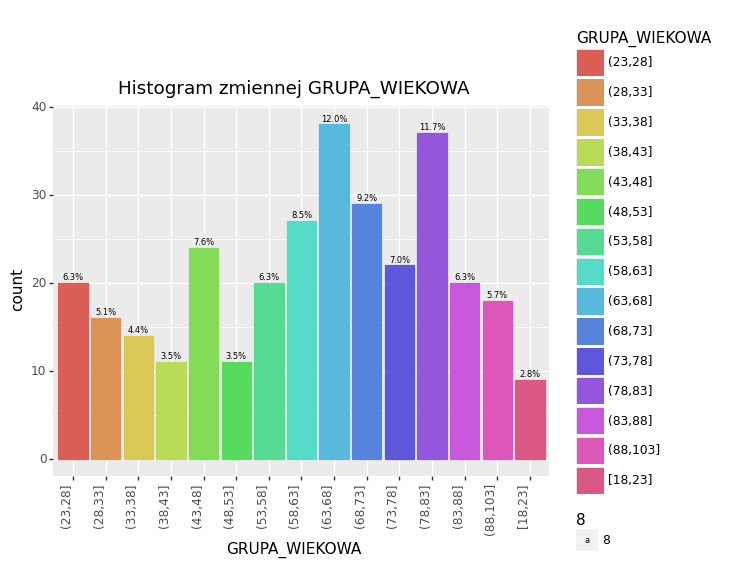

<ggplot: (-9223371905784338670)>

In [232]:
(ggplot(pom_tab, aes('GRUPA_WIEKOWA',fill='GRUPA_WIEKOWA', color = 'GRUPA_WIEKOWA'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1, size=8),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
 +theme(axis_text_x=element_text(rotation=90, hjust=1))
 +ggtitle('Histogram zmiennej GRUPA_WIEKOWA')
)

In [233]:
X['GRUPA_WIEKOWA'] = X.apply(laczenie_3_ostatnich_grup, axis=1)

In [234]:
# na testowym
X_t['GRUPA_WIEKOWA'] = X_t.apply(laczenie_3_ostatnich_grup, axis=1)

In [235]:
# zmienna PLEC

In [236]:
#pokazanie unikatowych wartości zmiennej
np.unique(X.PLEC)

array([1, 2], dtype=int64)

In [237]:
# globalna zmiana typu zmiennej na obiektowy
X.PLEC=X.PLEC.astype('object') 

In [238]:
# na testowym
X_t.PLEC=X_t.PLEC.astype('object') 

In [239]:
# tworzy tabele ze zmienną oraz zmienną- klucz ID_PACJENTA
pom_tab = tabela_pomocnicza('PLEC','ID_PACJENTA')
pom_tab

,ID_PACJENTA,PLEC,count,count_opposit
0,557901,2,1,163
2178,291102,2,1,163
2866,813276,2,1,163
109516,932334,2,1,163
109517,56837,2,1,163
...,...,...,...,...
1776697,603738,1,1,153
1776739,754358,1,1,153
1776775,766343,1,1,153
1777325,765667,1,1,153


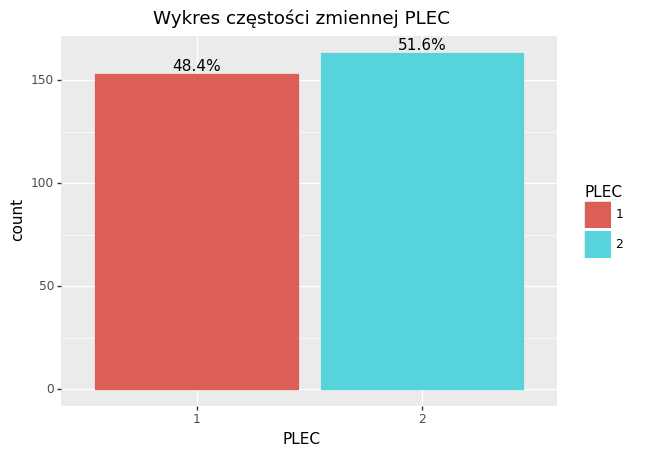

<ggplot: (-9223371905731030868)>

In [240]:
wykres_czestosci('PLEC')

In [241]:
# zmienna TERYT_POWIATU

In [242]:
# unikatowe wartości zmiennej
np.unique(X.TERYT_POWIATU)

array([1201., 1202., 1203., 1204., 1205., 1206., 1207., 1208., 1209.,
       1210., 1211., 1212., 1213., 1214., 1215., 1216., 1217., 1218.,
       1219., 1261., 1262., 1263.])

In [243]:
# globalna zmiana typu zmiennej na object
X.TERYT_POWIATU=X.TERYT_POWIATU.astype('object') 

In [244]:
# na testowym
X_t.TERYT_POWIATU=X_t.TERYT_POWIATU.astype('object') 

In [245]:
# tworzy tabele ze zmienną oraz zmienną- klucz ID_PACJENTA
pom_tab = tabela_pomocnicza('TERYT_POWIATU','ID_PACJENTA')

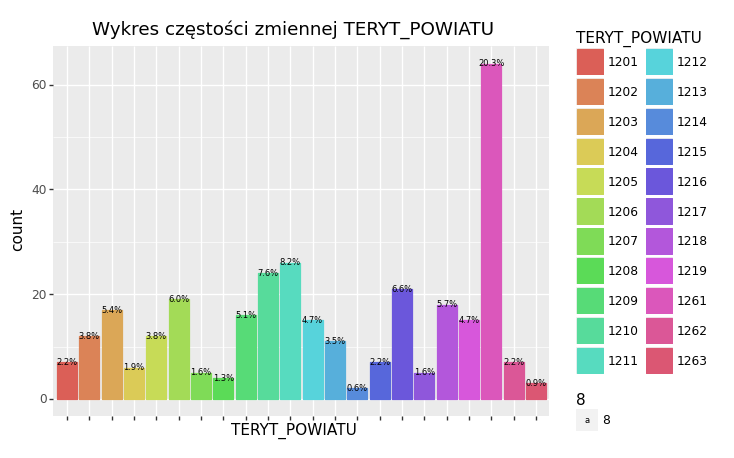

<ggplot: (-9223371906213733309)>

In [246]:
(ggplot(pom_tab, aes('TERYT_POWIATU',fill='TERYT_POWIATU', color = 'TERYT_POWIATU'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1, size=8),
     stat='count',
     nudge_y=0.125,
     #va='bottom',
     format_string='{:.1f}%'
 )
 +theme(axis_text_x=element_blank())
 +ggtitle('Wykres częstości zmiennej TERYT_POWIATU')
)

In [247]:
# grupowanie kodów powiatu w podregiony
def grupowanie(x):
    if x['TERYT_POWIATU'] in [1215,1211,1217]: #nowotarski
        return 1
    elif x['TERYT_POWIATU'] in [1218,1213,1203,1212]: #oświęcimski
        return 2
    elif x['TERYT_POWIATU'] in [1208,1214,1206,1209,1219,1201]: #krakowski
        return 3
    elif x['TERYT_POWIATU'] in [1202,1204,1263,1216]:#tarnowski
        return 4
    elif x['TERYT_POWIATU'] in [1205,1210,1262,1207]: #nowosądecki
        return 5
    elif x['TERYT_POWIATU'] in [1261]:#m.stołeczne kraków
        return 6
pom_tab['TERYT_POWIATU_PODREGION'] =pom_tab.apply(grupowanie , axis=1)

In [248]:
# zmiana typu na object
pom_tab['TERYT_POWIATU_PODREGION']= pom_tab['TERYT_POWIATU_PODREGION'].astype('object') 

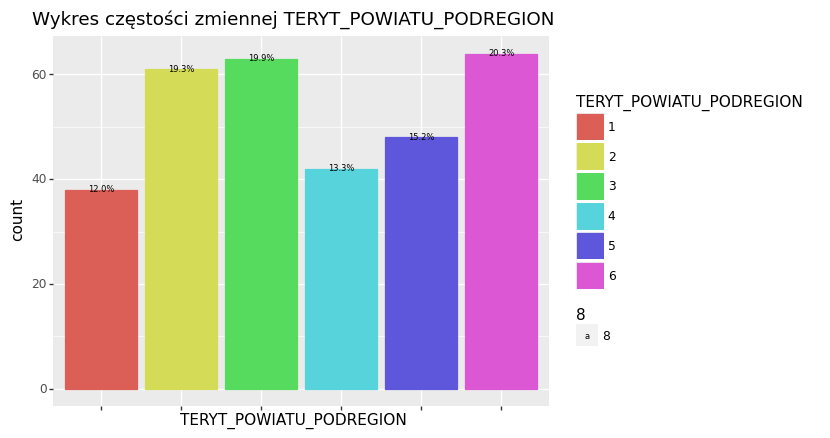

<ggplot: (-9223371905729909069)>

In [249]:
#wykres
(ggplot(pom_tab, aes('TERYT_POWIATU_PODREGION',fill='TERYT_POWIATU_PODREGION', color = 'TERYT_POWIATU_PODREGION'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1, size=8),
     stat='count',
     nudge_y=0.125,
     #va='bottom',
     format_string='{:.1f}%'
 )
 +theme(axis_text_x=element_blank())
 +ggtitle('Wykres częstości zmiennej TERYT_POWIATU_PODREGION')
)

In [250]:
X['TERYT_POWIATU_PODREGION'] =  X.apply(grupowanie , axis=1)

X['TERYT_POWIATU_PODREGION']= X['TERYT_POWIATU_PODREGION'].astype('object') 

X = X.drop(['TERYT_POWIATU'], axis=1)

In [251]:
# na testowym
X_t['TERYT_POWIATU_PODREGION'] =  X_t.apply(grupowanie , axis=1)

X_t['TERYT_POWIATU_PODREGION']= X_t['TERYT_POWIATU_PODREGION'].astype('object') 

X_t = X_t.drop(['TERYT_POWIATU'], axis=1) #w razie jakby była ta zmienna to usunąć

In [252]:
# ID_RECEPTY tylko identyfikator - nic nie wnosi do analizy

In [253]:
# dla zmiennych pochodzących z tabeli recepty tworzę tabele pomocznice, z badaną zmienną oraz zmienną ID_RECEPTY
# jest ona unikalna, a ID_PACJENTA 

In [254]:
#zmienna ROK_REALIZACJI_RECEPTY

In [255]:
# zmiana typu zmiennej na object
X.ROK_REALIZACJI_RECEPTY= X.ROK_REALIZACJI_RECEPTY.astype('object') 

In [256]:
# zmiana typu zmiennej na object
X_t.ROK_REALIZACJI_RECEPTY = X_t.ROK_REALIZACJI_RECEPTY.astype('object') 

In [257]:
# tworzy tabele ze zmienną oraz zmienną- klucz ID_RECEPTY
pom_tab = tabela_pomocnicza('ROK_REALIZACJI_RECEPTY','ID_RECEPTY')

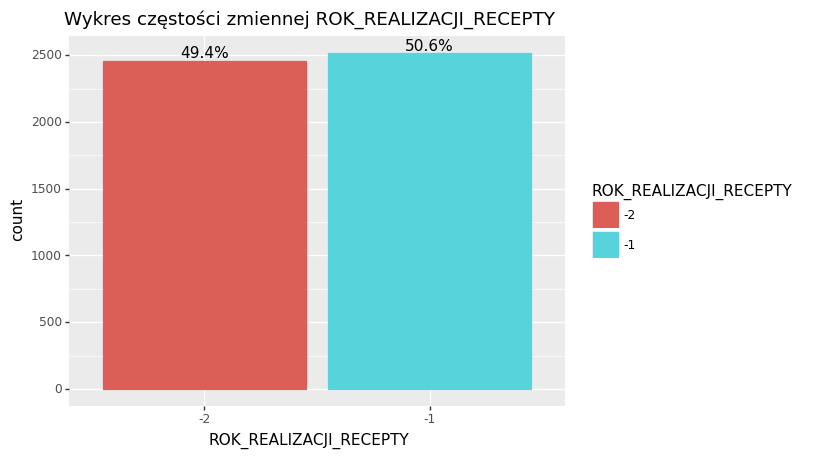

<ggplot: (131123403654)>

In [258]:
wykres_czestosci('ROK_REALIZACJI_RECEPTY')

In [259]:
# zmienna TYDZIEN_POCZATKU_REALIZACJI

In [260]:
# wartości unikatowe
np.unique(X.TYDZIEN_POCZATKU_REALIZACJI)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [261]:
# tworzy tabele ze zmienną oraz zmienną- klucz ID_RECEPTY
pom_tab = tabela_pomocnicza('TYDZIEN_POCZATKU_REALIZACJI','ID_RECEPTY')

In [262]:
# wiersze, w których unikatowa wartość TYDZIEN_POCZATKU_REALIZACJI pojawia się więcej niż 133 razy
pom_tab[pom_tab['count_opposit']>133]

,ID_RECEPTY,TYDZIEN_POCZATKU_REALIZACJI,count,count_opposit


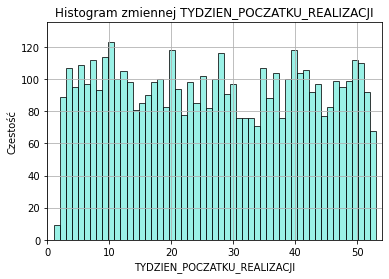

<module 'matplotlib.pyplot' from 'C:\\Users\\Feflo\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

In [263]:
# histogram
histogram('TYDZIEN_POCZATKU_REALIZACJI')

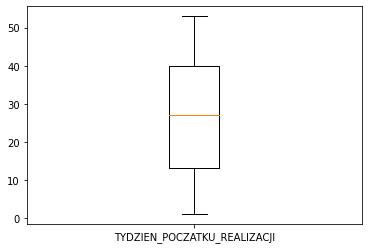

In [264]:
plt.boxplot(pom_tab['TYDZIEN_POCZATKU_REALIZACJI'],labels=['TYDZIEN_POCZATKU_REALIZACJI'])
plt.show()

In [265]:
#ZMIENNA KOD_ATC

In [266]:
#ilość unikatowych wartości ( aż 49 )
len(np.unique(X.KOD_ATC))

48

In [267]:
# wartości unikatowe zmiennej
np.unique(X.KOD_ATC)

array(['A02', 'A04', 'A07', 'A10', 'A11', 'A12', 'B01', 'B02', 'B03',
       'C01', 'C02', 'C03', 'C07', 'C08', 'C09', 'C10', 'D01', 'D03',
       'D05', 'D07', 'G01', 'G02', 'G03', 'G04', 'H02', 'H03', 'H04',
       'J01', 'J02', 'J05', 'L01', 'L02', 'L04', 'M01', 'M03', 'M04',
       'N02', 'N03', 'N04', 'N05', 'N06', 'P02', 'R01', 'R03', 'R06',
       'S01', 'V03', 'V04'], dtype=object)

In [28]:
# tworzy tabele ze zmienną oraz zmienną- klucz ID_RECEPTY
pom_tab = tabela_pomocnicza('KOD_ATC','ID_RECEPTY')

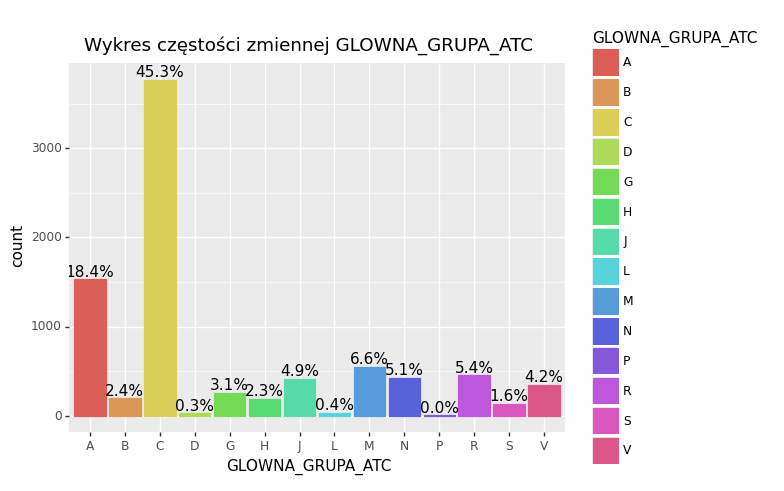

<ggplot: (99592888787)>

In [32]:
pom_tab['GLOWNA_GRUPA_ATC'] = pom_tab['KOD_ATC'].str[:1]
wykres_czestosci('GLOWNA_GRUPA_ATC')

In [33]:
pom_tab = tabela_pomocnicza('KOD_ATC','ID_RECEPTY')

In [34]:
#10 najliczniejszych kategorii
list(pom_tab[['KOD_ATC','count_opposit']].drop_duplicates().nlargest(14, 'count_opposit')['KOD_ATC'])

['C09',
 'C10',
 'C03',
 'A10',
 'A02',
 'C08',
 'M01',
 'R03',
 'J01',
 'C07',
 'A12',
 'V04',
 'G04',
 'B01']

In [35]:
pom_tab.groupby(['KOD_ATC'], as_index=False)['count_opposit']#.agg('nunique')#()#.nlargest(10, 'count_opposit')

# Czemu odpowiadają poszczególne litery na pierwszym miejscu kodu ATC
A – Przewód pokarmowy i metabolizm
B – Krew i układ krwiotwórczy
C – Układ sercowo-naczyniowy
D – Dermatologia
G – Układ moczowo-płciowy i hormony płciowe
H – Leki hormonalne do stosowania wewnętrznego (bez hormonów płciowych)
J – Leki stosowane w zakażeniach (przeciwinfekcyjne)
L – Leki przeciwnowotworowe i immunomodulujące
M – Układ mięśniowo-szkieletowy
N – Ośrodkowy układ nerwowy
P – Leki przeciwpasożytnicze, owadobójcze i repelenty
R – Układ oddechowy
S – Narządy wzroku i słuchu
V – Różne (varia)

In [36]:
def pogrupowanie(x):
    if x['KOD_ATC'] in ['C09', 'C10', 'C03', 'A10', 'A02', 'C08', 'M01', 'C07', 'J01', 'R03']:
        return x['KOD_ATC']
    else:
        return 'OTHER'
pom_tab['KOD_ATC']= pom_tab.apply(pogrupowanie, axis=1)

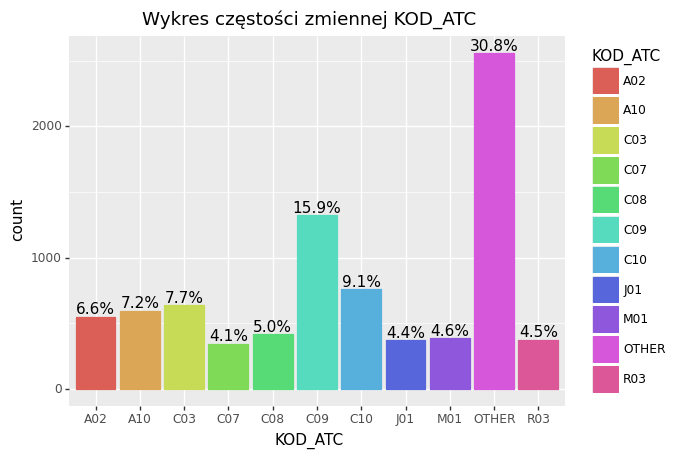

<ggplot: (-9223371937261957600)>

In [37]:
wykres_czestosci('KOD_ATC')

In [273]:
X['KOD_ATC']= X.apply(pogrupowanie, axis=1)

In [274]:
# na testowym
X_t['KOD_ATC']= X_t.apply(pogrupowanie, axis=1)

LICZBA_OPAKOWAN               object 
 22  KOD_PROCEDURY                 float64
 23  KOD_ROZPOZNANIA               int64  
 24  CZY_GLOWNA                    object 
 25  count_id                      int64  
 26  enumrate_id                   object 
 27  enumrate_pacjent_id           object 
 28  enumrate_pacjent_id_kontaktu  int16  

In [41]:
# ZMIENNA LICZBA_OPAKOWAN


In [42]:
# zmiana separatora dziesiętnego na kropkę
X['LICZBA_OPAKOWAN'] = X['LICZBA_OPAKOWAN'].apply(przecinek)

In [43]:
# na testowym
X_t['LICZBA_OPAKOWAN'] = X_t['LICZBA_OPAKOWAN'].apply(przecinek)

In [44]:
# tworzy tabele ze zmienną oraz zmienną- klucz ID_RECEPTY
pom_tab = tabela_pomocnicza('LICZBA_OPAKOWAN','ID_RECEPTY')

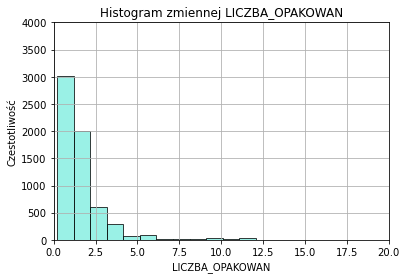

In [45]:
# the histogram of the data
nbins=20
plt.hist(pom_tab['LICZBA_OPAKOWAN'],nbins, facecolor='#79edde', alpha=0.75,ec="k")
plt.xlabel('LICZBA_OPAKOWAN')
plt.ylabel('Czestotliwość')
plt.title('Histogram zmiennej LICZBA_OPAKOWAN')
#plt.text(round(sr,2)+0.2, 4000, 'średia = \n'+ str(round(sr,2)), color='r')
plt.axis([0, 20, 0, 4000])
plt.grid(True)
#plt.plot([sr,sr],[0,5000], 'k-', lw=2, ls = '--', color='r')

plt.savefig('LICZBA_OPAKOWAN histogram.png', dpi=250, optimize=False,pad_inches=0.1, bbox_inches = "tight")
plt.show()

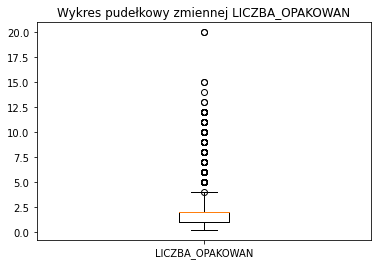

In [46]:
plt.boxplot(pom_tab['LICZBA_OPAKOWAN'],labels=['LICZBA_OPAKOWAN'],whis=2)
plt.title('Wykres pudełkowy zmiennej LICZBA_OPAKOWAN')
plt.show()

In [280]:
#winorizing

In [281]:
min_10 = pom_tab['LICZBA_OPAKOWAN'].quantile(0.05)
print( min_10)
max_10 = pom_tab['LICZBA_OPAKOWAN'].quantile(0.95)
print( max_10)

1.0
4.0


In [282]:
print(pom_tab['LICZBA_OPAKOWAN'].skew())

3.6427805193063243


In [283]:
np.unique(pom_tab['LICZBA_OPAKOWAN'])

array([ 0.2    ,  0.4    ,  0.5    ,  0.6    ,  0.8    ,  0.875  ,
        1.     ,  1.00007,  1.2    ,  1.4    ,  1.5    ,  1.6    ,
        1.66667,  2.     ,  2.1    ,  2.2    ,  2.5    ,  2.8    ,
        3.     ,  3.2    ,  3.33333,  3.334  ,  4.     ,  4.00001,
        5.     ,  6.     ,  7.     ,  8.     ,  9.     , 10.     ,
       11.     , 12.     , 13.     , 14.     , 15.     , 20.     ])

In [284]:
pom_tab['LICZBA_OPAKOWAN'] = np.where(pom_tab['LICZBA_OPAKOWAN'] <min_10, min_10,pom_tab['LICZBA_OPAKOWAN'])
pom_tab['LICZBA_OPAKOWAN']= np.where(pom_tab['LICZBA_OPAKOWAN'] >max_10, max_10,pom_tab['LICZBA_OPAKOWAN'])
print(pom_tab['LICZBA_OPAKOWAN'].skew())

1.040954634632586


In [285]:
# kwadrat albo  pierwiastek
pom_tab['LICZBA_OPAKOWAN']= pom_tab['LICZBA_OPAKOWAN']**(2)

In [286]:
# logarytm
pom_tab['LICZBA_OPAKOWAN']= pom_tab['LICZBA_OPAKOWAN'].apply(lambda x: np.log(x+1))

In [287]:
# maksymalna wartość zmiennej 
pom_tab['LICZBA_OPAKOWAN'].max()

2.833213344056216

In [288]:
 pom_tab['LICZBA_OPAKOWAN'].min()

0.6931471805599453

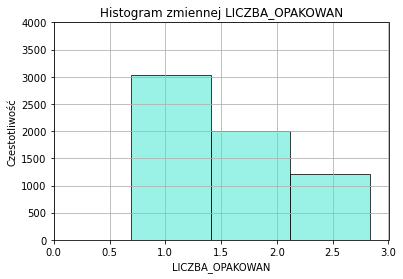

In [289]:
# the histogram of the data
nbins=3
plt.hist(pom_tab['LICZBA_OPAKOWAN'],nbins, facecolor='#79edde', alpha=0.75,ec="k")
plt.xlabel('LICZBA_OPAKOWAN')
plt.ylabel('Czestotliwość')
plt.title('Histogram zmiennej LICZBA_OPAKOWAN')
#plt.text(round(sr,2)+0.2, 4000, 'średia = \n'+ str(round(sr,2)), color='r')
plt.axis([0, 3, 0, 4000])
plt.grid(True)
#plt.plot([sr,sr],[0,5000], 'k-', lw=2, ls = '--', color='r')

plt.savefig('LICZBA_OPAKOWAN histogram.png', dpi=250, optimize=False,pad_inches=0.1, bbox_inches = "tight")
plt.show()

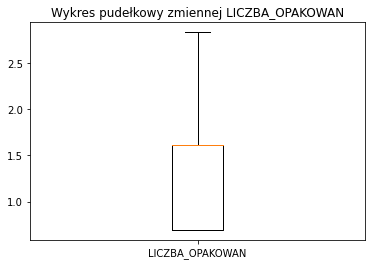

In [290]:
plt.boxplot(pom_tab['LICZBA_OPAKOWAN'],labels=['LICZBA_OPAKOWAN'],whis=2)
plt.title('Wykres pudełkowy zmiennej LICZBA_OPAKOWAN')
plt.show()

In [291]:
X['LICZBA_OPAKOWAN'] = np.where(X['LICZBA_OPAKOWAN'] <min_10, min_10,X['LICZBA_OPAKOWAN'])
X['LICZBA_OPAKOWAN']= np.where(X['LICZBA_OPAKOWAN'] >max_10, max_10,X['LICZBA_OPAKOWAN'])

In [292]:
# zbior testowy
X_t['LICZBA_OPAKOWAN'] = np.where(X_t['LICZBA_OPAKOWAN'] <min_10, min_10,X_t['LICZBA_OPAKOWAN'])
X_t['LICZBA_OPAKOWAN']= np.where(X_t['LICZBA_OPAKOWAN'] >max_10, max_10,X_t['LICZBA_OPAKOWAN'])

In [293]:
pom_tab.quantile(q=0.25)

ID_RECEPTY         2.557196e+06
LICZBA_OPAKOWAN    6.931472e-01
count              1.000000e+00
count_opposit      1.994000e+03
Name: 0.25, dtype: float64

In [294]:
pom_tab.quantile(q=0.5)

ID_RECEPTY         5.061204e+06
LICZBA_OPAKOWAN    1.609438e+00
count              1.000000e+00
count_opposit      1.994000e+03
Name: 0.5, dtype: float64

In [295]:
pom_tab.quantile(q=0.75)

ID_RECEPTY         7.550089e+06
LICZBA_OPAKOWAN    1.609438e+00
count              2.000000e+00
count_opposit      2.996000e+03
Name: 0.75, dtype: float64

In [296]:
# ZMIENNA KOD_PROCEDURY

In [297]:
# zmiana typu zmiennej na string ponieważ będę chciał pogrupować wartości po pierwszej części tj, do kropki
X.KOD_PROCEDURY = X.KOD_PROCEDURY.astype('str')

In [298]:
# zmiana na testowym
X_t.KOD_PROCEDURY = X_t.KOD_PROCEDURY.astype('str')

In [299]:
# stworzeenie pogrupowanej zmiennej
def procedury(x):
    return x['KOD_PROCEDURY'][:x['KOD_PROCEDURY'].index('.')]


In [300]:
X['KOD_PROCEDURY_GLOWNY'] = X.apply(procedury, axis=1)

In [301]:
#test
X_t['KOD_PROCEDURY_GLOWNY'] = X_t.apply(procedury, axis=1)

In [302]:
# ilość unikatowych wartości
len(np.unique(X.KOD_PROCEDURY_GLOWNY))

199

In [303]:
# unikatowe wartości
np.unique(X.KOD_PROCEDURY_GLOWNY)

array(['109', '113', '12', '126', '129', '131', '137', '143', '145',
       '155', '166', '167', '17', '179', '181', '187', '188', '196',
       '204', '208', '214', '216', '217', '219', '231', '232', '234',
       '237', '239', '243', '248', '250', '251', '252', '256', '262',
       '264', '266', '273', '274', '283', '29', '296', '3', '300', '310',
       '313', '315', '316', '320', '328', '33', '333', '337', '339', '34',
       '340', '370', '380', '382', '383', '384', '391', '394', '4', '40',
       '403', '430', '440', '444', '446', '455', '456', '46', '467',
       '472', '474', '475', '481', '483', '489', '49', '494', '499',
       '500', '521', '537', '542', '546', '55', '550', '556', '563',
       '565', '572', '573', '574', '576', '58', '580', '590', '603',
       '604', '609', '61', '610', '613', '616', '619', '62', '620', '623',
       '631', '634', '638', '639', '647', '649', '653', '655', '665',
       '667', '683', '686', '690', '691', '692', '693', '696', '701',
       '

In [304]:
# tworzy tabele ze zmienną oraz zmienną- klucz ID_EPIZODU
pom_tab = tabela_pomocnicza('KOD_PROCEDURY_GLOWNY','ID_EPIZODU')

In [305]:
#10 najliczniejszych kategorii
l_largest= list(pom_tab[['KOD_PROCEDURY_GLOWNY','count_opposit']].drop_duplicates().nlargest(10, 'count_opposit')['KOD_PROCEDURY_GLOWNY'])

In [306]:
# wydzielenie 10 nalicczniejszych głównych grup
def top_10_kat(x):
    if x['KOD_PROCEDURY_GLOWNY'] in l_largest:
        return x['KOD_PROCEDURY_GLOWNY']
    else:
        return 'OTHER'
    
pom_tab['TOP_10_KOD_PROCEDURY_GLOWNY'] = pom_tab.apply(top_10_kat, axis=1)

In [307]:
pom_tab['KOD_PROCEDURY'] = pom_tab['TOP_10_KOD_PROCEDURY_GLOWNY']

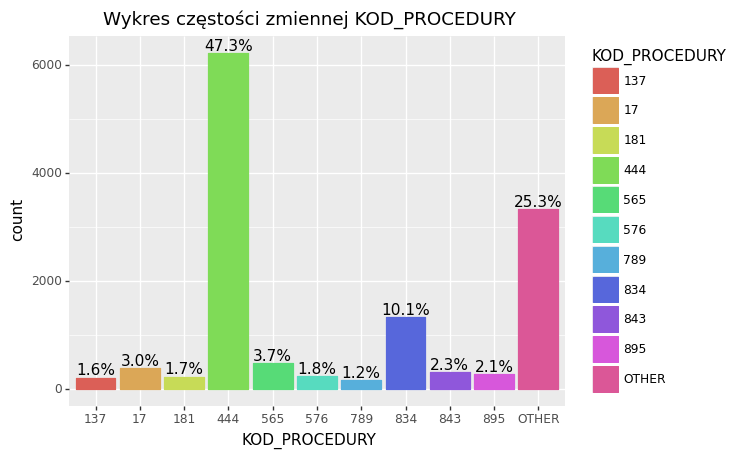

<ggplot: (131069704249)>

In [308]:
wykres_czestosci('KOD_PROCEDURY')

In [309]:
X['TOP_10_KOD_PROCEDURY_GLOWNY'] = X.apply(top_10_kat, axis=1)

X['KOD_PROCEDURY'] = X['TOP_10_KOD_PROCEDURY_GLOWNY']

X = X.drop(['TOP_10_KOD_PROCEDURY_GLOWNY'], axis=1)
X = X.drop(['KOD_PROCEDURY_GLOWNY'], axis=1)

In [310]:
# testowy

X_t['TOP_10_KOD_PROCEDURY_GLOWNY'] = X_t.apply(top_10_kat, axis=1)

X_t['KOD_PROCEDURY'] = X_t['TOP_10_KOD_PROCEDURY_GLOWNY']

X_t = X_t.drop(['TOP_10_KOD_PROCEDURY_GLOWNY'], axis=1)
X_t = X_t.drop(['KOD_PROCEDURY_GLOWNY'], axis=1)

In [311]:
# ZMIENNA KOD_ROZPOZNANIA

In [312]:
# ilość unikatowych wartości
len(np.unique(X.KOD_ROZPOZNANIA))

1040

In [313]:
# tworzy tabele ze zmienną oraz zmienną- klucz ID_KONTAKTU
pom_tab = tabela_pomocnicza('KOD_ROZPOZNANIA','ID_KONTAKTU')

In [314]:
len(np.unique(pom_tab[pom_tab['count_opposit']<20]['KOD_ROZPOZNANIA']))

939

In [315]:
len(np.unique(pom_tab.KOD_ROZPOZNANIA.astype('str').str[:5]))

580

In [316]:
len(np.unique(pom_tab.KOD_ROZPOZNANIA.astype('str').str[:2]))

19

In [317]:
# wydzielenie pierwszych znaków kodu do utworzenia grup
pom_tab['KOD_ROZPOZNANIA_GLOWNA_GRUPA'] = pom_tab.KOD_ROZPOZNANIA.astype('str').str[:2]

In [318]:
# liczy ile razy występuje dana grupa
pom_tab['count_opposit_2znaki'] = pom_tab.groupby(['KOD_ROZPOZNANIA_GLOWNA_GRUPA'])['ID_KONTAKTU'].transform('count')

In [319]:
#10 najmniej licznych kategorii
l_lowest= list(pom_tab[['KOD_ROZPOZNANIA_GLOWNA_GRUPA','count_opposit_2znaki']].drop_duplicates().nsmallest(6, 'count_opposit_2znaki')['KOD_ROZPOZNANIA_GLOWNA_GRUPA'])

In [320]:
def top_10_kat(x):
    if x['KOD_ROZPOZNANIA_GLOWNA_GRUPA'] in l_lowest:
        return 'OTHER'
    else:
        return x['KOD_ROZPOZNANIA_GLOWNA_GRUPA']
        
pom_tab['TOP_13_KOD_ROZPOZNANIA_GLOWNY'] = pom_tab.apply(top_10_kat, axis=1)

In [321]:
pom_tab['KOD_ROZPOZNANIA']= pom_tab['TOP_13_KOD_ROZPOZNANIA_GLOWNY']

In [322]:
l_lowest

['40', '77', '72', '86', '79', '51']

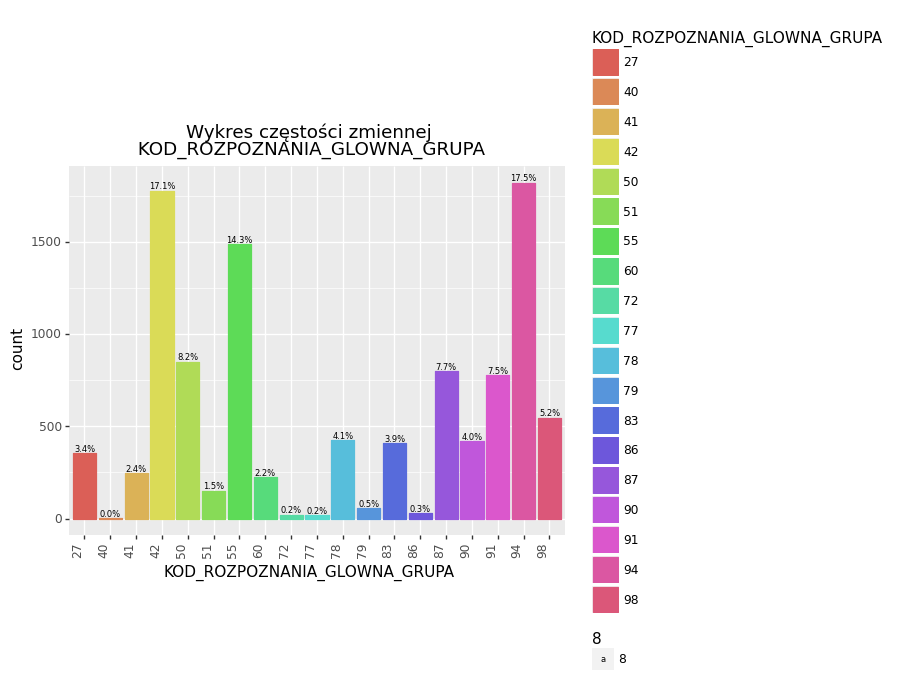

<ggplot: (131225705294)>

In [323]:
(ggplot(pom_tab, aes('KOD_ROZPOZNANIA_GLOWNA_GRUPA',fill='KOD_ROZPOZNANIA_GLOWNA_GRUPA', color = 'KOD_ROZPOZNANIA_GLOWNA_GRUPA'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1, size=8),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
 +theme(axis_text_x=element_text(rotation=90, hjust=1))
 +ggtitle('Wykres częstości zmiennej\n KOD_ROZPOZNANIA_GLOWNA_GRUPA')
)

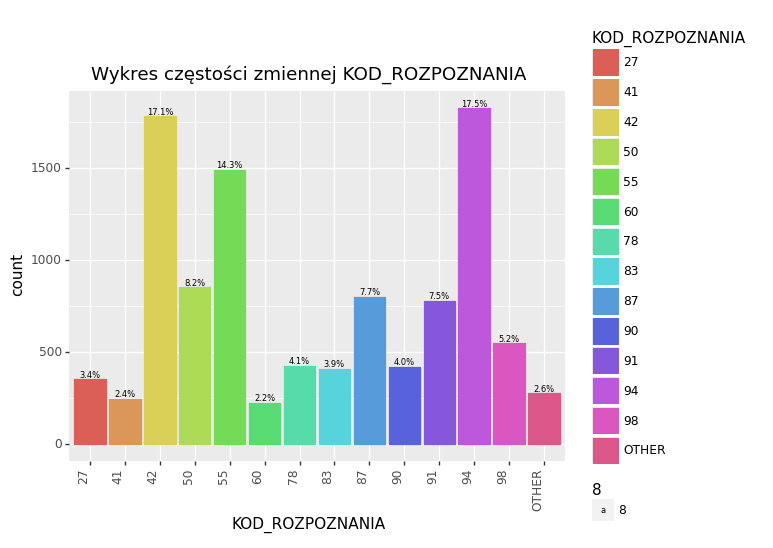

<ggplot: (131225693083)>

In [324]:
(ggplot(pom_tab, aes('KOD_ROZPOZNANIA',fill='KOD_ROZPOZNANIA', color = 'KOD_ROZPOZNANIA'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1, size=8),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
 +theme(axis_text_x=element_text(rotation=90, hjust=1))
 +ggtitle('Wykres częstości zmiennej KOD_ROZPOZNANIA')
)

In [325]:
X['KOD_ROZPOZNANIA_GLOWNA_GRUPA'] = X.KOD_ROZPOZNANIA.astype('str').str[:2]
X['TOP_13_KOD_ROZPOZNANIA_GLOWNY'] = X.apply(top_10_kat, axis=1)

X['KOD_ROZPOZNANIA'] = X['TOP_13_KOD_ROZPOZNANIA_GLOWNY']

X = X.drop(['TOP_13_KOD_ROZPOZNANIA_GLOWNY','KOD_ROZPOZNANIA_GLOWNA_GRUPA'], axis=1)

In [326]:
#testowy
X_t['KOD_ROZPOZNANIA_GLOWNA_GRUPA'] = X_t.KOD_ROZPOZNANIA.astype('str').str[:2]
X_t['TOP_13_KOD_ROZPOZNANIA_GLOWNY'] = X_t.apply(top_10_kat, axis=1)

X_t['KOD_ROZPOZNANIA'] = X_t['TOP_13_KOD_ROZPOZNANIA_GLOWNY']

X_t = X_t.drop(['TOP_13_KOD_ROZPOZNANIA_GLOWNY','KOD_ROZPOZNANIA_GLOWNA_GRUPA'], axis=1)

In [327]:
np.unique(X_t['KOD_ROZPOZNANIA'])

array(['27', '41', '42', '50', '55', '60', '78', '83', '87', '90', '91',
       '94', '98', 'OTHER'], dtype=object)

In [328]:
np.unique(X['KOD_ROZPOZNANIA'])

array(['27', '41', '42', '50', '55', '60', '78', '83', '87', '90', '91',
       '94', '98', 'OTHER'], dtype=object)

In [329]:
# ZMIENNA CZY_GLOWNA

In [330]:
# tworzy tabele ze zmienną oraz zmienną- klucz ID_KONTAKTU
pom_tab = tabela_pomocnicza('CZY_GLOWNA','ID_KONTAKTU')

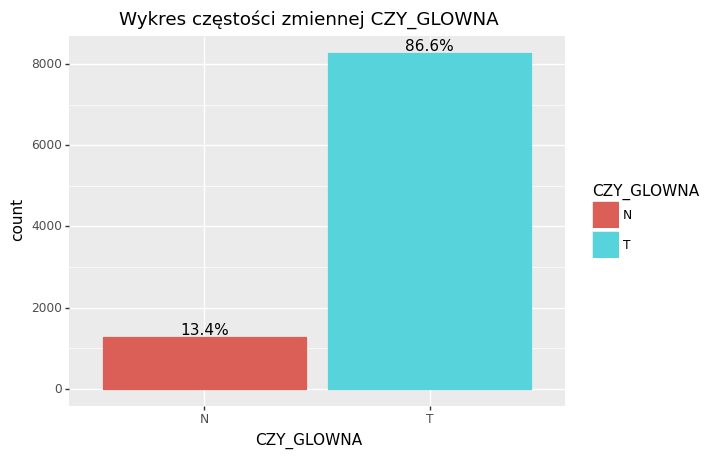

<ggplot: (131114228779)>

In [331]:
wykres_czestosci('CZY_GLOWNA')

In [332]:
# nie wiem czy to ok z tym kodem_rozpoznania

In [333]:
pom_tab = pd.concat([X['CZY_GLOWNA'],X['KOD_ROZPOZNANIA'], X['ID_KONTAKTU']], axis=1)
pom_tab = pom_tab.drop_duplicates()
pom_tab['count'] = pom_tab.groupby(['ID_KONTAKTU'])['CZY_GLOWNA'].transform('count')
pom_tab['count_opposit'] = pom_tab.groupby(['CZY_GLOWNA'])['ID_KONTAKTU'].transform('count')
pom_tab[pom_tab['count']>1]

,CZY_GLOWNA,KOD_ROZPOZNANIA,ID_KONTAKTU,count,count_opposit
0,N,41,39523973,2,1881
1,T,27,39523973,2,8267
2378,N,41,95446268,2,1881
2379,T,94,95446268,2,8267
3516,N,83,99796463,2,1881
...,...,...,...,...,...
1777422,T,50,82023583,2,8267
1777589,N,50,97463460,2,1881
1777590,T,50,97463460,2,8267
1777955,N,OTHER,39668153,2,1881


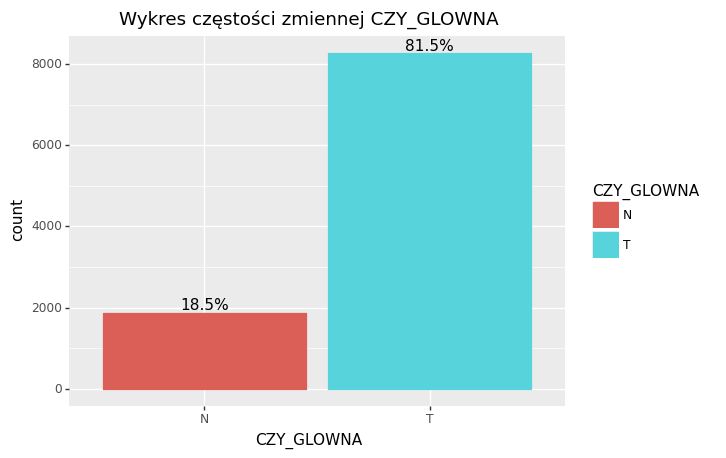

<ggplot: (-9223371905846951799)>

In [334]:
(ggplot(pom_tab, aes('CZY_GLOWNA', fill='CZY_GLOWNA', color='CZY_GLOWNA'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
 +ggtitle('Wykres częstości zmiennej CZY_GLOWNA')
)

In [335]:
X['CZY_GLOWNA'] = X['CZY_GLOWNA'].astype('object')

In [336]:
# na testowym
X_t['CZY_GLOWNA'] = X_t['CZY_GLOWNA'].astype('object')

In [337]:
X = X.drop(['ID_PACJENTA', 'ID_EPIZODU', 'ID_KONTAKTU', 'ID_KSIEGI_GLOWNEJ' ], axis=1)

In [338]:
# na testowym
X_t = X_t.drop(['ID_PACJENTA', 'ID_EPIZODU', 'ID_KONTAKTU', 'ID_KSIEGI_GLOWNEJ' ], axis=1)

In [339]:
#---- zmiany na zmiennych na całym zbiorze treningowym 

In [340]:
X = X.drop(['ROK_WZGL','TYDZIEN_UDARU', 'ID_RECEPTY'], axis=1)

In [341]:
#na testowym
X_t = X_t.drop(['ROK_WZGL','TYDZIEN_UDARU', 'ID_RECEPTY'], axis=1)

In [342]:
len(y[y['CZY_UDAR']==1])/ len(y[y['CZY_UDAR']==0])

2.117133906140703

In [343]:
len(y[y['CZY_UDAR']==1])/len(y[y['CZY_UDAR']==0])

2.117133906140703

In [344]:
X_t.to_csv('zbior_testowy_X_v3.csv')
y_t.to_csv('zmienna_objasniana_test_v3.csv')

In [345]:
X.to_csv('zbior_treningowy_X_v3.csv')
y.to_csv('zmienna_objasniana_v3.csv')

In [346]:
X.columns

Index(['ROK_SWIADCZENIA', 'TYDZIEN_POCZATKU_KONTAKTU',
       'TYDZIEN_KONCA_KONTAKTU', 'KOD_ZAKRESU', 'KOD_PRODUKTU_JEDNOSTKOWEGO',
       'TYP_KOMORKI', 'RODZAJ_SWIADCZEN', 'GRUPA_WIEKOWA', 'PLEC',
       'ROK_REALIZACJI_RECEPTY', 'TYDZIEN_POCZATKU_REALIZACJI', 'KOD_ATC',
       'LICZBA_OPAKOWAN', 'KOD_PROCEDURY', 'KOD_ROZPOZNANIA', 'CZY_GLOWNA',
       'Enumerate_pacjent_id_kontaktu', 'KWOTA_ROZLICZONA_LOG',
       'TERYT_POWIATU_PODREGION'],
      dtype='object')

In [347]:
X_t.columns

Index(['ROK_SWIADCZENIA', 'TYDZIEN_POCZATKU_KONTAKTU',
       'TYDZIEN_KONCA_KONTAKTU', 'KOD_ZAKRESU', 'KOD_PRODUKTU_JEDNOSTKOWEGO',
       'TYP_KOMORKI', 'RODZAJ_SWIADCZEN', 'GRUPA_WIEKOWA', 'PLEC',
       'ROK_REALIZACJI_RECEPTY', 'TYDZIEN_POCZATKU_REALIZACJI', 'KOD_ATC',
       'LICZBA_OPAKOWAN', 'KOD_PROCEDURY', 'KOD_ROZPOZNANIA', 'CZY_GLOWNA',
       'Enumerate_pacjent_id_kontaktu', 'KWOTA_ROZLICZONA_LOG',
       'TERYT_POWIATU_PODREGION'],
      dtype='object')

In [348]:
# Koniec analizy częstości i histogramów

In [477]:
import pandas as pd, numpy as np

In [478]:
X_t = pd.read_csv('zbior_testowy_X_v3.csv')
y_t = pd.read_csv('zmienna_objasniana_test_v3.csv')

C:\Python37\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,6,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [479]:
X = pd.read_csv('zbior_treningowy_X_v3.csv')
y = pd.read_csv('zmienna_objasniana_v3.csv')

In [480]:
X.drop(columns='Unnamed: 0', inplace = True)
y.drop(columns='Unnamed: 0', inplace = True)
X_t.drop(columns='Unnamed: 0', inplace = True)
y_t.drop(columns='Unnamed: 0', inplace = True)

In [481]:
X.columns

Index(['ROK_SWIADCZENIA', 'TYDZIEN_POCZATKU_KONTAKTU',
       'TYDZIEN_KONCA_KONTAKTU', 'KOD_ZAKRESU', 'KOD_PRODUKTU_JEDNOSTKOWEGO',
       'TYP_KOMORKI', 'RODZAJ_SWIADCZEN', 'GRUPA_WIEKOWA', 'PLEC',
       'ROK_REALIZACJI_RECEPTY', 'TYDZIEN_POCZATKU_REALIZACJI', 'KOD_ATC',
       'LICZBA_OPAKOWAN', 'KOD_PROCEDURY', 'KOD_ROZPOZNANIA', 'CZY_GLOWNA',
       'Enumerate_pacjent_id_kontaktu', 'KWOTA_ROZLICZONA_LOG',
       'TERYT_POWIATU_PODREGION'],
      dtype='object')

In [482]:
len(X_t)/(len(X)+len(X_t))

0.32470673935484556

In [483]:
# staandaryzacjjaaa - mniej podatna na wartośści odstaające s 82

In [484]:
np.unique(X_t['Enumerate_pacjent_id_kontaktu'])

array(['(0,20>', '(20,40>', '(40,60>', '(60,80>', '(80,100>', 'Ponad 100'],
      dtype=object)

In [485]:
y_t[y_t['CZY_UDAR']==1]

,CZY_UDAR
572138,1
572139,1
572140,1
572141,1
572142,1
...,...
572841,1
572842,1
572843,1
572844,1


In [486]:
from sklearn import preprocessing

In [487]:
# standaryzacja

In [488]:
scaler = preprocessing.StandardScaler().fit(X[['KWOTA_ROZLICZONA_LOG',
'TYDZIEN_POCZATKU_KONTAKTU',
'TYDZIEN_KONCA_KONTAKTU',
'TYDZIEN_POCZATKU_REALIZACJI',
'LICZBA_OPAKOWAN']])

In [489]:
kolumny_stand = scaler.transform(X[['KWOTA_ROZLICZONA_LOG',
'TYDZIEN_POCZATKU_KONTAKTU',
'TYDZIEN_KONCA_KONTAKTU',
'TYDZIEN_POCZATKU_REALIZACJI',
'LICZBA_OPAKOWAN']])

In [490]:
X['KWOTA_ROZLICZONA_LOG']=kolumny_stand[:,0]
X['TYDZIEN_POCZATKU_KONTAKTU']=kolumny_stand[:,1]
X['TYDZIEN_KONCA_KONTAKTU']=kolumny_stand[:,2]
X['TYDZIEN_POCZATKU_REALIZACJI']=kolumny_stand[:,3]
X['LICZBA_OPAKOWAN']=kolumny_stand[:,4]

In [491]:
#użycie tej samej średniej i odchylenia co w treningowym
kolumny_stand_test = scaler.transform(X_t[['KWOTA_ROZLICZONA_LOG',
'TYDZIEN_POCZATKU_KONTAKTU',
'TYDZIEN_KONCA_KONTAKTU',
'TYDZIEN_POCZATKU_REALIZACJI',
'LICZBA_OPAKOWAN']])

X_t['KWOTA_ROZLICZONA_LOG']=kolumny_stand_test[:,0]
X_t['TYDZIEN_POCZATKU_KONTAKTU']=kolumny_stand_test[:,1]
X_t['TYDZIEN_KONCA_KONTAKTU']=kolumny_stand_test[:,2]
X_t['TYDZIEN_POCZATKU_REALIZACJI']=kolumny_stand_test[:,3]
X_t['LICZBA_OPAKOWAN']=kolumny_stand_test[:,4]

In [492]:
X.columns

Index(['ROK_SWIADCZENIA', 'TYDZIEN_POCZATKU_KONTAKTU',
       'TYDZIEN_KONCA_KONTAKTU', 'KOD_ZAKRESU', 'KOD_PRODUKTU_JEDNOSTKOWEGO',
       'TYP_KOMORKI', 'RODZAJ_SWIADCZEN', 'GRUPA_WIEKOWA', 'PLEC',
       'ROK_REALIZACJI_RECEPTY', 'TYDZIEN_POCZATKU_REALIZACJI', 'KOD_ATC',
       'LICZBA_OPAKOWAN', 'KOD_PROCEDURY', 'KOD_ROZPOZNANIA', 'CZY_GLOWNA',
       'Enumerate_pacjent_id_kontaktu', 'KWOTA_ROZLICZONA_LOG',
       'TERYT_POWIATU_PODREGION'],
      dtype='object')

In [493]:
X.KOD_ZAKRESU = X.KOD_ZAKRESU.astype('str')
X_t.KOD_ZAKRESU = X_t.KOD_ZAKRESU.astype('str')
X.TYP_KOMORKI = X.TYP_KOMORKI.astype('str')
X_t.TYP_KOMORKI = X_t.TYP_KOMORKI.astype('str')
X.KOD_PROCEDURY = X.KOD_PROCEDURY.astype('str')
X_t.KOD_PROCEDURY = X_t.KOD_PROCEDURY.astype('str')
X_t.KOD_ROZPOZNANIA = X_t.KOD_ROZPOZNANIA.astype('str')
X.KOD_ROZPOZNANIA = X.KOD_ROZPOZNANIA.astype('str')

In [494]:
# korelacja 

In [495]:
np.unique(X.KOD_ZAKRESU.astype('str'))

array(['1371242', '2101194', '2157194', '2262194', '2314194', '2429194',
       '2451194', '2641194', '2747194', '2786194', '2830194', '3867121',
       '4229194', '5435179', '7506810', 'OTHER'], dtype=object)

In [431]:
X.corr()

,ROK_SWIADCZENIA,TYDZIEN_POCZATKU_KONTAKTU,TYDZIEN_KONCA_KONTAKTU,RODZAJ_SWIADCZEN,PLEC,ROK_REALIZACJI_RECEPTY,TYDZIEN_POCZATKU_REALIZACJI,LICZBA_OPAKOWAN,KWOTA_ROZLICZONA_LOG,TERYT_POWIATU_PODREGION
ROK_SWIADCZENIA,1.000000,-0.000824,-0.003786,-0.010910,0.036655,0.033863,-0.007758,-0.049171,0.025142,-0.058607
TYDZIEN_POCZATKU_KONTAKTU,-0.000824,1.000000,0.986567,-0.025648,0.030483,0.000869,0.022671,0.033631,-0.118597,-0.151237
TYDZIEN_KONCA_KONTAKTU,-0.003786,0.986567,1.000000,-0.030793,0.044422,0.000384,0.025529,0.034662,-0.110996,-0.153630
RODZAJ_SWIADCZEN,-0.010910,-0.025648,-0.030793,1.000000,-0.143180,0.007210,0.007338,0.015241,-0.200813,0.125034
PLEC,0.036655,0.030483,0.044422,-0.143180,1.000000,-0.009251,0.014400,-0.055857,-0.089809,-0.289099
ROK_REALIZACJI_RECEPTY,0.033863,0.000869,0.000384,0.007210,-0.009251,1.000000,0.047280,0.009416,0.000876,0.004522
TYDZIEN_POCZATKU_REALIZACJI,-0.007758,0.022671,0.025529,0.007338,0.014400,0.047280,1.000000,0.016726,-0.010295,-0.002177
LICZBA_OPAKOWAN,-0.049171,0.033631,0.034662,0.015241,-0.055857,0.009416,0.016726,1.000000,0.036741,0.016843
KWOTA_ROZLICZONA_LOG,0.025142,-0.118597,-0.110996,-0.200813,-0.089809,0.000876,-0.010295,0.036741,1.000000,0.100512
TERYT_POWIATU_PODREGION,-0.058607,-0.151237,-0.153630,0.125034,-0.289099,0.004522,-0.002177,0.016843,0.100512,1.000000


In [432]:
from dython import nominal

In [433]:
for i in X.columns:
    print(i)
    print(np.unique(X[i]))

ROK_SWIADCZENIA
[-2 -1]
TYDZIEN_POCZATKU_KONTAKTU
[-1.70056207 -1.63575244 -1.57094282 -1.50613319 -1.44132357 -1.37651394
 -1.31170431 -1.24689469 -1.18208506 -1.11727544 -1.05246581 -0.98765618
 -0.92284656 -0.85803693 -0.79322731 -0.72841768 -0.66360805 -0.59879843
 -0.5339888  -0.46917918 -0.40436955 -0.33955992 -0.2747503  -0.20994067
 -0.14513105 -0.08032142 -0.01551179  0.04929783  0.11410746  0.17891708
  0.24372671  0.30853633  0.37334596  0.43815559  0.50296521  0.56777484
  0.63258446  0.69739409  0.76220372  0.82701334  0.89182297  0.95663259
  1.02144222  1.08625185  1.15106147  1.2158711   1.28068072  1.34549035
  1.41029998  1.4751096   1.53991923  1.60472885  1.66953848]
TYDZIEN_KONCA_KONTAKTU
[-1.70931929 -1.64450139 -1.57968349 -1.5148656  -1.4500477  -1.3852298
 -1.3204119  -1.255594   -1.1907761  -1.1259582  -1.06114031 -0.99632241
 -0.93150451 -0.86668661 -0.80186871 -0.73705081 -0.67223291 -0.60741502
 -0.54259712 -0.47777922 -0.41296132 -0.34814342 -0.28332552 -0

In [434]:
cor_tab = nominal.compute_associations(X,nominal_columns = ['ROK_SWIADCZENIA', 'KOD_ZAKRESU', 'KOD_PRODUKTU_JEDNOSTKOWEGO',
      'RODZAJ_SWIADCZEN', 'GRUPA_WIEKOWA', 'PLEC', 
       'ROK_REALIZACJI_RECEPTY',  'KOD_ATC', 'TYP_KOMORKI',
        'KOD_PROCEDURY', 'KOD_ROZPOZNANIA', 'CZY_GLOWNA',
       'Enumerate_pacjent_id_kontaktu',
       'TERYT_POWIATU_PODREGION'])

In [435]:
# usuwa z wierszy
cor_tab = cor_tab[['KWOTA_ROZLICZONA_LOG','TYDZIEN_POCZATKU_KONTAKTU',
'TYDZIEN_KONCA_KONTAKTU','TYDZIEN_POCZATKU_REALIZACJI','LICZBA_OPAKOWAN']]

In [436]:
# usuwa z kolumn
cor_tab = cor_tab.drop(['KWOTA_ROZLICZONA_LOG','TYDZIEN_POCZATKU_KONTAKTU',
'TYDZIEN_KONCA_KONTAKTU','TYDZIEN_POCZATKU_REALIZACJI','LICZBA_OPAKOWAN'])

In [437]:
import seaborn as sns

In [438]:
import matplotlib.pyplot as plt 

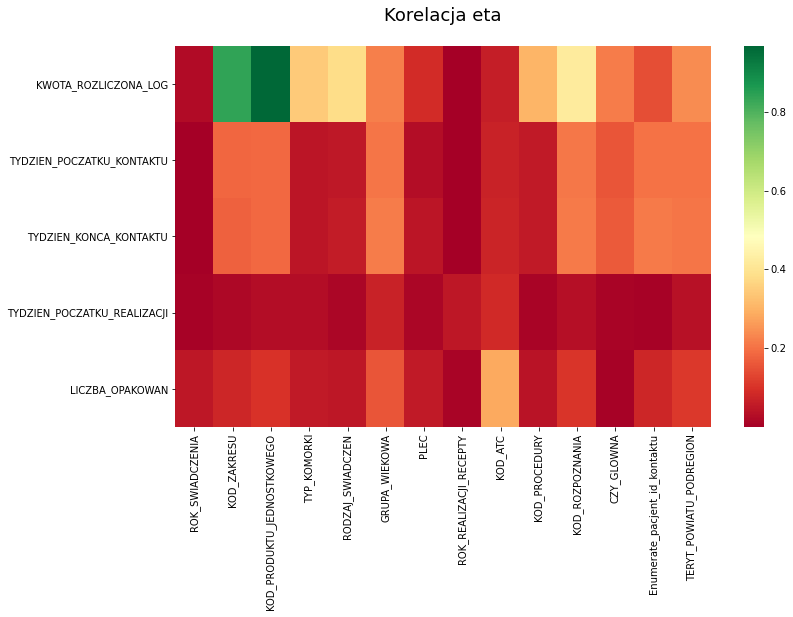

In [439]:
# korelacja eta
fig, ax = plt.subplots(figsize = (12,7))
title = 'Korelacja eta'
plt.title(title,fontsize = 18)
ttl = ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
#ax.axis('off')
sns.heatmap(cor_tab.T,cmap='RdYlGn',ax=ax)
plt.savefig('seabornPandas.png', dpi=100)
plt.show()

In [440]:
# V Cramera

In [441]:
v_cramer = nominal.compute_associations(X[['ROK_SWIADCZENIA', 'KOD_ZAKRESU', 'KOD_PRODUKTU_JEDNOSTKOWEGO',
      'RODZAJ_SWIADCZEN', 'GRUPA_WIEKOWA', 'PLEC', 
       'ROK_REALIZACJI_RECEPTY',  'KOD_ATC',
        'KOD_PROCEDURY', 'KOD_ROZPOZNANIA', 'CZY_GLOWNA',
       'Enumerate_pacjent_id_kontaktu',
       'TERYT_POWIATU_PODREGION']], nominal_columns=['ROK_SWIADCZENIA', 'KOD_ZAKRESU', 'KOD_PRODUKTU_JEDNOSTKOWEGO',
      'RODZAJ_SWIADCZEN', 'GRUPA_WIEKOWA', 'PLEC', 
       'ROK_REALIZACJI_RECEPTY',  'KOD_ATC', 'TYP_KOMORKI',
        'KOD_PROCEDURY', 'KOD_ROZPOZNANIA', 'CZY_GLOWNA',
       'Enumerate_pacjent_id_kontaktu',
       'TERYT_POWIATU_PODREGION'])

C:\Python37\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


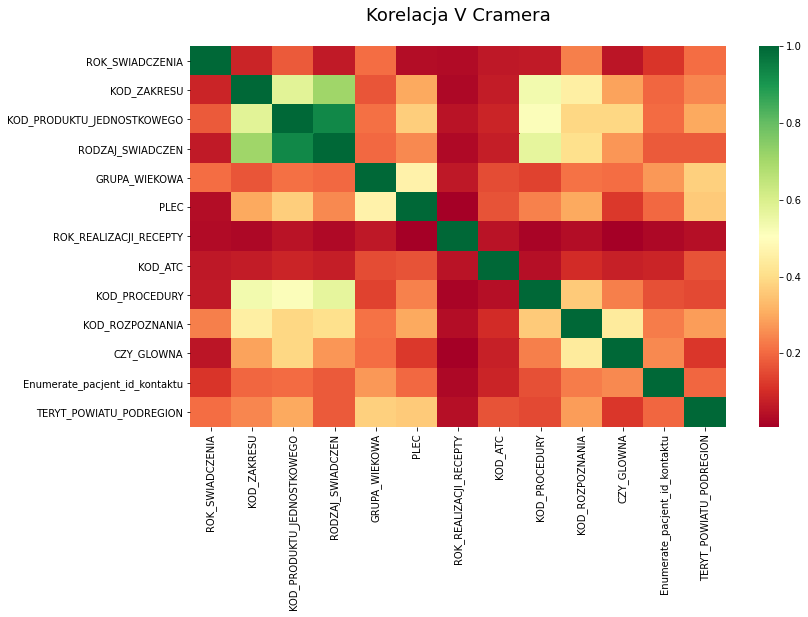

In [442]:
fig, ax = plt.subplots(figsize = (12,7))
title = 'Korelacja V Cramera'
plt.title(title,fontsize = 18)
ttl = ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
#ax.axis('off')
sns.heatmap(v_cramer.T,cmap='RdYlGn',ax=ax)
plt.savefig('vCramera.png', dpi=100)
plt.show()

In [443]:
# spearman

In [444]:
cor_spearman = X[['KWOTA_ROZLICZONA_LOG','TYDZIEN_POCZATKU_KONTAKTU',
'TYDZIEN_KONCA_KONTAKTU','TYDZIEN_POCZATKU_REALIZACJI','LICZBA_OPAKOWAN']].corr('spearman')

In [445]:
cor_spearman

,KWOTA_ROZLICZONA_LOG,TYDZIEN_POCZATKU_KONTAKTU,TYDZIEN_KONCA_KONTAKTU,TYDZIEN_POCZATKU_REALIZACJI,LICZBA_OPAKOWAN
KWOTA_ROZLICZONA_LOG,1.000000,-0.123994,-0.115327,-0.012425,0.031332
TYDZIEN_POCZATKU_KONTAKTU,-0.123994,1.000000,0.985274,0.022585,0.041573
TYDZIEN_KONCA_KONTAKTU,-0.115327,0.985274,1.000000,0.025493,0.040427
TYDZIEN_POCZATKU_REALIZACJI,-0.012425,0.022585,0.025493,1.000000,0.020660
LICZBA_OPAKOWAN,0.031332,0.041573,0.040427,0.020660,1.000000


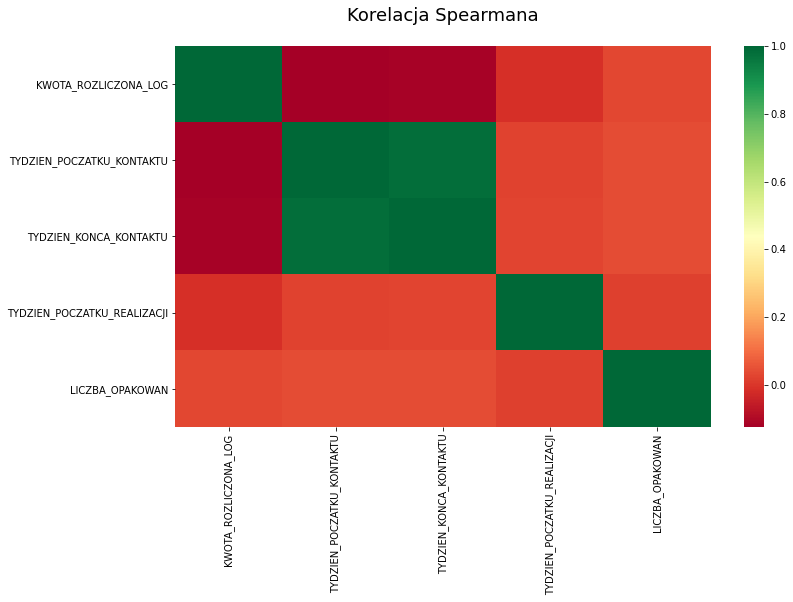

In [446]:
fig, ax = plt.subplots(figsize = (12,7))
title = 'Korelacja Spearmana'
plt.title(title,fontsize = 18)
ttl = ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
#ax.axis('off')
sns.heatmap(cor_spearman.T,cmap='RdYlGn',ax=ax)
plt.savefig('vCramera.png', dpi=100)
plt.show()

In [447]:
# drop Tydzien_poczatku kontaktu, kod_produktu jednostkowego kod zakresu

In [448]:
len(y)

1778035

In [449]:
# przypisuje nazwy kolumn 
data_final_vars=X.columns.values.tolist()
y=y

In [450]:
np.unique(X.KOD_ZAKRESU.astype('str'))

array(['1371242', '2101194', '2157194', '2262194', '2314194', '2429194',
       '2451194', '2641194', '2747194', '2786194', '2830194', '3867121',
       '4229194', '5435179', '7506810', 'OTHER'], dtype=object)

In [451]:
np.unique(X_t.KOD_ZAKRESU.astype('str'))

array(['1371242', '2101194', '2157194', '2262194', '2314194', '2429194',
       '2451194', '2641194', '2747194', '2786194', '2830194', '3867121',
       '4229194', '5435179', '7506810', 'OTHER'], dtype=object)

In [452]:
from sklearn.preprocessing import LabelEncoder

In [453]:
col_object = list(X.select_dtypes(include=['object']).columns)
col_object

['KOD_ZAKRESU',
 'KOD_PRODUKTU_JEDNOSTKOWEGO',
 'TYP_KOMORKI',
 'GRUPA_WIEKOWA',
 'KOD_ATC',
 'KOD_PROCEDURY',
 'KOD_ROZPOZNANIA',
 'CZY_GLOWNA',
 'Enumerate_pacjent_id_kontaktu']

In [454]:
X_pom = X


In [455]:
for j in col_object:
    X_pom[j] = X_pom[j].astype('str')

In [456]:
#KOD_ZAKRESU
#KOD_PRODUKTU_JEDNOSTKOWEGO
#GRUPA_WIEKOWA
#KOD_ATC
#KOD_PROCEDURY
#KOD_ROZPOZNANIA
#CZY_GLOWNA
#Enumerate_pacjent_id_kontaktu
#KOD_PROCEDURY_GLOWNY

In [457]:
np.unique(X.KOD_ZAKRESU.astype('str'))

array(['1371242', '2101194', '2157194', '2262194', '2314194', '2429194',
       '2451194', '2641194', '2747194', '2786194', '2830194', '3867121',
       '4229194', '5435179', '7506810', 'OTHER'], dtype=object)

In [458]:
lb_make = LabelEncoder()
d1={}
for i in col_object:
    print(i)
    lb_make.fit(X_pom[i])
    d1[i] = dict(zip(lb_make.classes_, lb_make.transform(lb_make.classes_)))
    X_pom[i] = lb_make.transform(X_pom[i])

KOD_ZAKRESU
KOD_PRODUKTU_JEDNOSTKOWEGO
TYP_KOMORKI
GRUPA_WIEKOWA
KOD_ATC
KOD_PROCEDURY
KOD_ROZPOZNANIA
CZY_GLOWNA
Enumerate_pacjent_id_kontaktu


In [459]:
#importances = X_pom.drop('CZY_UDAR', axis=1).apply(lambda x: x.corr(X_pom.CZY_UDAR))

In [460]:
#indices = np.argsort(importances)
#print(importances[indices])

In [461]:
#zmienne_kor = []
#for i in range(0, len(indices)):
#    if np.abs(importances[i])>0.03:
#        zmienne_kor.append(X_pom.columns[i])

In [462]:
#X_pom = X_pom[zmienne_kor]

In [463]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [464]:
vif_tab = calc_vif(X_pom)
vif_tab

,variables,VIF
0,ROK_SWIADCZENIA,9.229353
1,TYDZIEN_POCZATKU_KONTAKTU,38.188310
2,TYDZIEN_KONCA_KONTAKTU,38.255268
3,KOD_ZAKRESU,20.124541
4,KOD_PRODUKTU_JEDNOSTKOWEGO,15.394024
5,TYP_KOMORKI,18.631957
6,RODZAJ_SWIADCZEN,6.964552
7,GRUPA_WIEKOWA,15.916906
8,PLEC,11.811259
9,ROK_REALIZACJI_RECEPTY,9.092213


In [465]:
#X_pom = X_pom.drop(labels = ['TYDZIEN_POCZATKU_KONTAKTU'], axis=1 )

In [466]:
X_pom = X_pom.drop(labels = ['TYDZIEN_KONCA_KONTAKTU'], axis=1 )

In [467]:
vif_tab = calc_vif(X_pom)
vif_tab

,variables,VIF
0,ROK_SWIADCZENIA,9.227635
1,TYDZIEN_POCZATKU_KONTAKTU,1.093286
2,KOD_ZAKRESU,19.999170
3,KOD_PRODUKTU_JEDNOSTKOWEGO,15.327705
4,TYP_KOMORKI,18.543390
5,RODZAJ_SWIADCZEN,6.921256
6,GRUPA_WIEKOWA,15.905872
7,PLEC,11.746070
8,ROK_REALIZACJI_RECEPTY,9.091719
9,TYDZIEN_POCZATKU_REALIZACJI,1.003735


In [468]:
X_pom = X_pom.drop(labels = ['KOD_ZAKRESU'], axis=1 )
vif_tab = calc_vif(X_pom)
vif_tab

,variables,VIF
0,ROK_SWIADCZENIA,9.181748
1,TYDZIEN_POCZATKU_KONTAKTU,1.092685
2,KOD_PRODUKTU_JEDNOSTKOWEGO,14.322699
3,TYP_KOMORKI,7.736874
4,RODZAJ_SWIADCZEN,5.206678
5,GRUPA_WIEKOWA,15.796872
6,PLEC,11.560843
7,ROK_REALIZACJI_RECEPTY,9.072432
8,TYDZIEN_POCZATKU_REALIZACJI,1.003732
9,KOD_ATC,4.136955


In [469]:
X_pom = X_pom.drop(labels = ['GRUPA_WIEKOWA'], axis=1 )
vif_tab = calc_vif(X_pom)
vif_tab

,variables,VIF
0,ROK_SWIADCZENIA,8.608972
1,TYDZIEN_POCZATKU_KONTAKTU,1.088523
2,KOD_PRODUKTU_JEDNOSTKOWEGO,14.061644
3,TYP_KOMORKI,7.664216
4,RODZAJ_SWIADCZEN,4.977658
5,PLEC,9.915375
6,ROK_REALIZACJI_RECEPTY,8.748085
7,TYDZIEN_POCZATKU_REALIZACJI,1.003573
8,KOD_ATC,4.128031
9,LICZBA_OPAKOWAN,1.020568


In [470]:
X_pom = X_pom.drop(labels = ['KOD_PRODUKTU_JEDNOSTKOWEGO'], axis=1 )
vif_tab = calc_vif(X_pom)
vif_tab

,variables,VIF
0,ROK_SWIADCZENIA,8.578023
1,TYDZIEN_POCZATKU_KONTAKTU,1.086534
2,TYP_KOMORKI,6.597566
3,RODZAJ_SWIADCZEN,4.962855
4,PLEC,9.820455
5,ROK_REALIZACJI_RECEPTY,8.598769
6,TYDZIEN_POCZATKU_REALIZACJI,1.003532
7,KOD_ATC,4.090881
8,LICZBA_OPAKOWAN,1.019490
9,KOD_PROCEDURY,4.707547


In [471]:
X_pom = X_pom.drop(labels = ['PLEC'], axis=1 )
vif_tab = calc_vif(X_pom)
vif_tab

,variables,VIF
0,ROK_SWIADCZENIA,7.988898
1,TYDZIEN_POCZATKU_KONTAKTU,1.086433
2,TYP_KOMORKI,5.967871
3,RODZAJ_SWIADCZEN,4.865826
4,ROK_REALIZACJI_RECEPTY,7.872730
5,TYDZIEN_POCZATKU_REALIZACJI,1.002999
6,KOD_ATC,4.017308
7,LICZBA_OPAKOWAN,1.016147
8,KOD_PROCEDURY,4.654587
9,KOD_ROZPOZNANIA,2.821706


In [472]:
zmienne_po_metodach_filter = list(vif_tab['variables'])

In [473]:
print(zmienne_po_metodach_filter)

['ROK_SWIADCZENIA', 'TYDZIEN_POCZATKU_KONTAKTU', 'TYP_KOMORKI', 'RODZAJ_SWIADCZEN', 'ROK_REALIZACJI_RECEPTY', 'TYDZIEN_POCZATKU_REALIZACJI', 'KOD_ATC', 'LICZBA_OPAKOWAN', 'KOD_PROCEDURY', 'KOD_ROZPOZNANIA', 'CZY_GLOWNA', 'Enumerate_pacjent_id_kontaktu', 'KWOTA_ROZLICZONA_LOG', 'TERYT_POWIATU_PODREGION']


In [474]:
vif_tab.to_csv('vif_tab_po_usunieciu_3.csv')

In [496]:
zmienne_po_metodach_filter  = ['ROK_SWIADCZENIA', 'TYDZIEN_POCZATKU_KONTAKTU', 'TYP_KOMORKI',
                               'RODZAJ_SWIADCZEN', 'ROK_REALIZACJI_RECEPTY', 'TYDZIEN_POCZATKU_REALIZACJI', 'KOD_ATC',
                               'LICZBA_OPAKOWAN', 'KOD_PROCEDURY', 'KOD_ROZPOZNANIA', 'CZY_GLOWNA', 
                               'Enumerate_pacjent_id_kontaktu', 'KWOTA_ROZLICZONA_LOG', 'TERYT_POWIATU_PODREGION']

In [497]:
X = X[zmienne_po_metodach_filter]

In [498]:
X.columns

Index(['ROK_SWIADCZENIA', 'TYDZIEN_POCZATKU_KONTAKTU', 'TYP_KOMORKI',
       'RODZAJ_SWIADCZEN', 'ROK_REALIZACJI_RECEPTY',
       'TYDZIEN_POCZATKU_REALIZACJI', 'KOD_ATC', 'LICZBA_OPAKOWAN',
       'KOD_PROCEDURY', 'KOD_ROZPOZNANIA', 'CZY_GLOWNA',
       'Enumerate_pacjent_id_kontaktu', 'KWOTA_ROZLICZONA_LOG',
       'TERYT_POWIATU_PODREGION'],
      dtype='object')

In [499]:
X_t.columns

Index(['ROK_SWIADCZENIA', 'TYDZIEN_POCZATKU_KONTAKTU',
       'TYDZIEN_KONCA_KONTAKTU', 'KOD_ZAKRESU', 'KOD_PRODUKTU_JEDNOSTKOWEGO',
       'TYP_KOMORKI', 'RODZAJ_SWIADCZEN', 'GRUPA_WIEKOWA', 'PLEC',
       'ROK_REALIZACJI_RECEPTY', 'TYDZIEN_POCZATKU_REALIZACJI', 'KOD_ATC',
       'LICZBA_OPAKOWAN', 'KOD_PROCEDURY', 'KOD_ROZPOZNANIA', 'CZY_GLOWNA',
       'Enumerate_pacjent_id_kontaktu', 'KWOTA_ROZLICZONA_LOG',
       'TERYT_POWIATU_PODREGION'],
      dtype='object')

In [500]:
X_t = X_t[zmienne_po_metodach_filter]

In [501]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

In [502]:
cat_list = ['ROK_SWIADCZENIA', 
    'TYP_KOMORKI', 'RODZAJ_SWIADCZEN',
       'ROK_REALIZACJI_RECEPTY',  'KOD_ATC',
        'KOD_PROCEDURY',  'KOD_ROZPOZNANIA',
       'Enumerate_pacjent_id_kontaktu','CZY_GLOWNA',
       'TERYT_POWIATU_PODREGION']

In [503]:
len(X)

1778035

In [ ]:
len(y)

In [463]:
# uzupełnienie kolumn które są w treningowym ale nie w testowym
#( testowy po prostu nie złapał wartości niektórych zmiennyh a przy tworzeniu 
#zmiennych binarnych powstały różnice w wymiarowości)

In [505]:
for i in cat_list:
    print(i)
    rated_dummies = pd.get_dummies(X[i], prefix=i, prefix_sep='_',)
    X = pd.concat([X, rated_dummies], axis=1)
    X = X.drop([i], axis=1)

ROK_SWIADCZENIA
TYP_KOMORKI
RODZAJ_SWIADCZEN
ROK_REALIZACJI_RECEPTY
KOD_ATC
KOD_PROCEDURY
KOD_ROZPOZNANIA
Enumerate_pacjent_id_kontaktu
CZY_GLOWNA
TERYT_POWIATU_PODREGION


In [506]:
for i in cat_list:

    rated_dummies = pd.get_dummies(X_t[i], prefix=i, prefix_sep='_',)
    X_t = pd.concat([X_t, rated_dummies], axis=1)
    X_t = X_t.drop([i], axis=1)

In [507]:
for i in list(X.columns)[4:]:
    if i not in X_t.columns:
        X_t[i] = 0
        print(i)

In [508]:
for i in list(X_t.columns)[4:]:
    if i not in X.columns:
        print(i)

In [510]:
len(X.columns)

Index(['TYDZIEN_POCZATKU_KONTAKTU', 'TYDZIEN_POCZATKU_REALIZACJI',
       'LICZBA_OPAKOWAN', 'KWOTA_ROZLICZONA_LOG', 'ROK_SWIADCZENIA_-2',
       'ROK_SWIADCZENIA_-1', 'TYP_KOMORKI_10', 'TYP_KOMORKI_1100',
       'TYP_KOMORKI_12', 'TYP_KOMORKI_1220', 'TYP_KOMORKI_1310',
       'TYP_KOMORKI_1500', 'TYP_KOMORKI_1580', 'TYP_KOMORKI_1600',
       'TYP_KOMORKI_1700', 'TYP_KOMORKI_1800', 'TYP_KOMORKI_OTHER',
       'RODZAJ_SWIADCZEN_1', 'RODZAJ_SWIADCZEN_2', 'RODZAJ_SWIADCZEN_3',
       'RODZAJ_SWIADCZEN_4', 'RODZAJ_SWIADCZEN_5', 'RODZAJ_SWIADCZEN_6',
       'RODZAJ_SWIADCZEN_7', 'RODZAJ_SWIADCZEN_8', 'RODZAJ_SWIADCZEN_9',
       'ROK_REALIZACJI_RECEPTY_-2', 'ROK_REALIZACJI_RECEPTY_-1', 'KOD_ATC_A02',
       'KOD_ATC_A10', 'KOD_ATC_C03', 'KOD_ATC_C07', 'KOD_ATC_C08',
       'KOD_ATC_C09', 'KOD_ATC_C10', 'KOD_ATC_J01', 'KOD_ATC_M01',
       'KOD_ATC_OTHER', 'KOD_ATC_R03', 'KOD_PROCEDURY_137', 'KOD_PROCEDURY_17',
       'KOD_PROCEDURY_181', 'KOD_PROCEDURY_444', 'KOD_PROCEDURY_565',
       'KOD

In [511]:
len(X_t.columns)

78

In [514]:
X_t.to_csv('Zbior_testowy_dummies_3.csv')

In [ ]:
X.to_csv('Zbior_uczacy_dummies_3.csv')

In [464]:
import pandas as pd, numpy as np

In [465]:
X = pd.read_csv('Zbior_uczacy_dummies_3.csv')

In [466]:
X_t = pd.read_csv('Zbior_testowy_dummies_3.csv')

In [467]:
y = pd.read_csv('zmienna_objasniana_v3.csv')
y_t = pd.read_csv('zmienna_objasniana_test_v3.csv')

In [468]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [469]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [470]:
y.drop(columns = 'Unnamed: 0', inplace = True)
y_t.drop(columns = 'Unnamed: 0', inplace = True)

In [471]:
X.drop(columns = 'Unnamed: 0', inplace = True)
X_t.drop(columns = 'Unnamed: 0', inplace = True)

In [472]:
len(y[y['CZY_UDAR']==1])/len(y)

0.6791924793381457

In [473]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

In [474]:
# przed połączeniem z innymi tabelami dzieli na zbiór testowy i treningowy aby móc wykonać undersampling na treningowym
from sklearn.model_selection import train_test_split
X_v, X_t_t, y_v, y_t_t = train_test_split(X_t, y_t,
                                                    stratify=y_t, 
                                                    test_size=0.5,random_state=105)

In [475]:
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from matplotlib.legend_handler import HandlerLine2D
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn import tree
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import linear_model
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score

In [476]:
# Regresja Logistyczna

In [477]:
constant_filter = VarianceThreshold(threshold=0.1)
constant_filter.fit(X)
X.columns[constant_filter.get_support()]

Index(['TYDZIEN_POCZATKU_KONTAKTU', 'TYDZIEN_POCZATKU_REALIZACJI',
       'LICZBA_OPAKOWAN', 'KWOTA_ROZLICZONA_LOG', 'ROK_SWIADCZENIA_-2',
       'ROK_SWIADCZENIA_-1', 'TYP_KOMORKI_OTHER', 'RODZAJ_SWIADCZEN_1',
       'RODZAJ_SWIADCZEN_3', 'RODZAJ_SWIADCZEN_5', 'ROK_REALIZACJI_RECEPTY_-2',
       'ROK_REALIZACJI_RECEPTY_-1', 'KOD_ATC_C09', 'KOD_ATC_OTHER',
       'KOD_PROCEDURY_444', 'KOD_PROCEDURY_OTHER', 'KOD_ROZPOZNANIA_27',
       'KOD_ROZPOZNANIA_42', 'KOD_ROZPOZNANIA_94',
       'Enumerate_pacjent_id_kontaktu_(0,20>',
       'Enumerate_pacjent_id_kontaktu_(20,40>', 'CZY_GLOWNA_N', 'CZY_GLOWNA_T',
       'TERYT_POWIATU_PODREGION_1', 'TERYT_POWIATU_PODREGION_2',
       'TERYT_POWIATU_PODREGION_4', 'TERYT_POWIATU_PODREGION_5',
       'TERYT_POWIATU_PODREGION_6'],
      dtype='object')

In [478]:
constant_columns = X.columns[constant_filter.get_support()]

In [479]:
X_proba_2 = X[constant_columns]

In [480]:
logreg = LogisticRegression(max_iter=1000, dual=False)
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_proba_2, np.ravel(y))
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False  True  True  True False False  True
 False  True False False  True False False  True  True  True  True  True
 False  True  True  True]
[10 13  4 12  1  5  1  1  1  8  2  1 14  1  6  7  1  9 11  1  1  1  1  1
  3  1  1  1]


In [481]:
lista_zm_log = []
for i in range(len(rfe.support_)):
    if rfe.support_[i] == True:
          lista_zm_log.append(X.columns[i])

In [482]:
lista_zm_log

['ROK_SWIADCZENIA_-2',
 'TYP_KOMORKI_10',
 'TYP_KOMORKI_1100',
 'TYP_KOMORKI_12',
 'TYP_KOMORKI_1500',
 'TYP_KOMORKI_1600',
 'TYP_KOMORKI_OTHER',
 'RODZAJ_SWIADCZEN_3',
 'RODZAJ_SWIADCZEN_4',
 'RODZAJ_SWIADCZEN_5',
 'RODZAJ_SWIADCZEN_6',
 'RODZAJ_SWIADCZEN_7',
 'RODZAJ_SWIADCZEN_9',
 'ROK_REALIZACJI_RECEPTY_-2',
 'ROK_REALIZACJI_RECEPTY_-1']

In [483]:
X_log = X[lista_zm_log]

In [484]:
X_log =X_log.drop(columns='RODZAJ_SWIADCZEN_6')
X_t = X_t.drop(columns='RODZAJ_SWIADCZEN_6')

In [485]:
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.563834
         Iterations 9
                              Results: Logit
Model:                  Logit              Pseudo R-squared:   0.101       
Dependent Variable:     CZY_UDAR           AIC:                2005061.7322
Date:                   2020-09-15 15:12   BIC:                2005235.2064
No. Observations:       1778035            Log-Likelihood:     -1.0025e+06 
Df Model:               13                 LL-Null:            -1.1157e+06 
Df Residuals:           1778021            LLR p-value:        0.0000      
Converged:              1.0000             Scale:              1.0000      
No. Iterations:         9.0000                                             
---------------------------------------------------------------------------
                           Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
ROK_SWIADCZENIA_-

In [486]:
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_log, np.ravel(y))

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [487]:
lista_zm_log_proba_2 = list(X_log.columns)

In [488]:
y_pred = logreg.predict(X_v[lista_zm_log_proba_2 ])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_v[lista_zm_log_proba_2], y_pred)))

Accuracy of logistic regression classifier on test set: 1.00


In [489]:
#valid

In [490]:
predicted_log_v = logreg.predict_proba(X_v[lista_zm_log_proba_2 ])[:,1]

In [491]:
for j in range(1,10):
    thresh_log_v = []
    for i in predicted_log_v:
        if i >= j/10:
            thresh_log_v.append(1)
        else:
            thresh_log_v.append(0)
    print(j)
    print('F1 score {}'.format(f1_score(y_v, np.round(thresh_log_v), average='macro')))       

1
F1 score 0.00477884173134045
2
F1 score 0.025834094861832455
3
F1 score 0.25875858257105755
4
F1 score 0.3371303891921494
5
F1 score 0.34139812606789327
6
F1 score 0.3487742265523021
7
F1 score 0.46947893722023176
8
F1 score 0.5010420639173135
9
F1 score 0.49978995702017465


In [492]:
thresh_log_v = []
for i in predicted_log_v:
    if i >= 0.8:
        thresh_log_v.append(1)
    else:
        thresh_log_v.append(0)

In [493]:
print('Recall score {}'.format(recall_score(y_v, np.round(thresh_log_v), average='macro')))
print('F1 score {}'.format(f1_score(y_v, np.round(thresh_log_v), average='macro')))
print('Precision score {}'.format(precision_score(y_v, np.round(thresh_log_v), average='macro')))
print('Accuracy score {}'.format(accuracy_score(y_v, np.round(thresh_log_v))))

Recall score 0.8019616828890738
F1 score 0.5010420639173135
Precision score 0.5060090246136658
Accuracy score 0.9567738781162787


In [494]:
confusion_matrix_v_log = confusion_matrix(y_v, thresh_log_v)
pd.DataFrame(confusion_matrix_v_log)

,0,1
0,408766,18353
1,125,229


In [495]:
#test

In [496]:
predicted_log_t = logreg.predict_proba(X_t_t[lista_zm_log_proba_2 ])[:,1]
thresh_log_t = []
for i in predicted_log_t:
    if i >= 0.8:
        thresh_log_t.append(1)
    else:
        thresh_log_t.append(0)
print('F1 score {}'.format(f1_score(y_t_t, np.round(thresh_log_t), average='macro')))

F1 score 0.5013955656008994


In [497]:
print('Recall score {}'.format(recall_score(y_t_t, np.round(thresh_log_t), average='macro')))
print('Precision score {}'.format(precision_score(y_t_t, np.round(thresh_log_t), average='macro')))
print('Accuracy score {}'.format(accuracy_score(y_t_t, np.round(thresh_log_t))))

Recall score 0.8213833844971921
Precision score 0.5062937546902178
Accuracy score 0.9561025933741


In [498]:
from sklearn.metrics import confusion_matrix
confusion_matrix_t_log = confusion_matrix(y_t_t, thresh_log_t)
pd.DataFrame(confusion_matrix_t_log)

,0,1
0,408466,18654
1,111,243


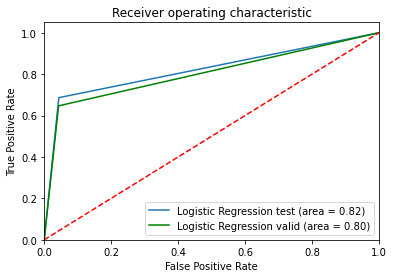

In [499]:

logit_roc_auc_t = roc_auc_score(y_t_t, thresh_log_t)
fpr_t, tpr_t, thresholds_t = roc_curve(y_t_t,thresh_log_t)

logit_roc_auc_v = roc_auc_score(y_v, thresh_log_v)
fpr_v, tpr_v, thresholds_v = roc_curve(y_v,thresh_log_v)


plt.figure()

plt.plot(fpr_t, tpr_t, label='Logistic Regression test (area = %0.2f)' % logit_roc_auc_t)

plt.plot(fpr_v, tpr_v, label='Logistic Regression valid (area = %0.2f)' % logit_roc_auc_v, color='green')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [500]:
# drzewo decyzyjne

In [123]:
dtree = DecisionTreeClassifier(random_state = 105)
dtree.fit(X, y)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=105, splitter='best')

In [124]:
pred = dtree.predict(X_v)  

In [126]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0


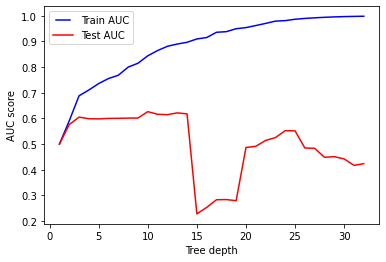

In [21]:
for max_depth in max_depths:
    print(max_depth)
    dt = DecisionTreeClassifier(random_state=105,max_depth=max_depth)
    dt.fit(X, y)
    train_pred = dt.predict(X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_v, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [23]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

In [24]:
for min_samples_split in min_samples_splits:
    print(min_samples_split)
    dt = DecisionTreeClassifier(random_state = 105, min_samples_split=min_samples_split, max_depth=10)
    dt.fit(X, y)
    train_pred = dt.predict(X)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_v, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
line1, = plt.plot(np.array(min_samples_splits), np.array(train_results), 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples split')


0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


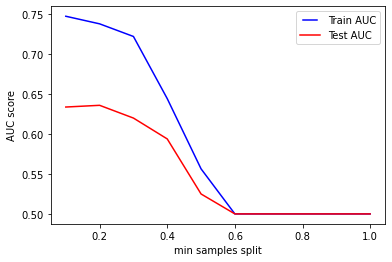

In [25]:
plt.show()

In [127]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []

0.1
0.2
0.30000000000000004
0.4
0.5


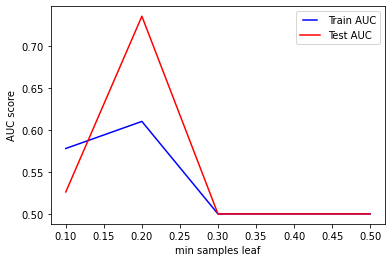

In [28]:
for min_samples_leaf in min_samples_leafs:
    print(min_samples_leaf)
    dt = DecisionTreeClassifier(random_state=105,min_samples_leaf=min_samples_leaf, max_depth=10, min_samples_split=0.2)
    dt.fit(X, y)
    train_pred = dt.predict(X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_v, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

In [29]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77


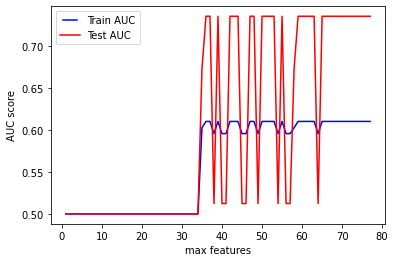

In [30]:
for max_feature in max_features:
    print(max_feature)
    dt = DecisionTreeClassifier(random_state=105, max_features=max_feature,min_samples_leaf =0.2, max_depth=10, min_samples_split=0.2)
    dt.fit(X, y)
    train_pred = dt.predict(X)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_v)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_v, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

In [501]:
# drzewo decyzyjne z wybranymi najlepszymi hiperparametrami
dtree = DecisionTreeClassifier(random_state=105, max_features=36,min_samples_leaf =0.2, max_depth=10, min_samples_split=0.2)
dtree.fit(X, y)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=36, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.2, min_samples_split=0.2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=105, splitter='best')

In [503]:
pred = dtree.predict(X_v)  

In [505]:
print('F1 score {}'.format(f1_score(y_v, np.round(pred), average='micro')))

F1 score 0.4712976024216734


In [506]:
# valid

In [507]:
predicted_tree_v = dtree.predict_proba(X_v)[:,1]

In [509]:
predicted_tree_v = dtree.predict_proba(X_v)[:,1]
for j in range(10,100,5):
    print((j/100))
    thresh_tree_v = []
    for i in predicted_tree_v:
        if i >= (j/100):
            thresh_tree_v.append(1)
        else:
            thresh_tree_v.append(0)
    print( roc_auc_score(y_v, thresh_tree_v))
    print('F1 score {}'.format(f1_score(y_v, np.round(thresh_tree_v), average='macro')))
    print('Accuracy score {}'.format(accuracy_score(y_v, np.round(thresh_tree_v))))

0.1
0.5
F1 score 0.0008274372585180458
Accuracy score 0.0008281224779108856
0.15
0.5
F1 score 0.0008274372585180458
Accuracy score 0.0008281224779108856
0.2
0.5
F1 score 0.0008274372585180458
Accuracy score 0.0008281224779108856
0.25
0.5
F1 score 0.0008274372585180458
Accuracy score 0.0008281224779108856
0.3
0.5
F1 score 0.0008274372585180458
Accuracy score 0.0008281224779108856
0.35
0.5
F1 score 0.0008274372585180458
Accuracy score 0.0008281224779108856
0.4
0.5
F1 score 0.0008274372585180458
Accuracy score 0.0008281224779108856
0.45
0.5
F1 score 0.0008274372585180458
Accuracy score 0.0008281224779108856
0.5
0.7354297046022302
F1 score 0.3216868063393117
Accuracy score 0.4712976024216734
0.55
0.7354297046022302
F1 score 0.3216868063393117
Accuracy score 0.4712976024216734
0.6
0.30905087340998644
F1 score 0.381796331326033
Accuracy score 0.6175898828697953
0.65
0.30905087340998644
F1 score 0.381796331326033
Accuracy score 0.6175898828697953
0.7
0.30905087340998644
F1 score 0.38179633132

In [511]:
predicted_tree_v = dtree.predict_proba(X_v)[:,1]

In [513]:
thresh_tree_v = []
for i in predicted_tree_v:
    if i >= 0.55:
        thresh_tree_v.append(1)
    else:
        thresh_tree_v.append(0)

print('AUC ' + str(roc_auc_score(y_v, thresh_tree_v)))
print('F1 score {}'.format(f1_score(y_v, np.round(thresh_tree_v), average='macro')))

AUC 0.7354297046022302
F1 score 0.3216868063393117


In [514]:
print('Recall score {}'.format(recall_score(y_v, np.round(thresh_tree_v), average='macro')))
print('Precision score {}'.format(precision_score(y_v, np.round(thresh_tree_v), average='macro')))
print('Accuracy score {}'.format(accuracy_score(y_v, np.round(thresh_tree_v)))) 

Recall score 0.7354297046022302
Precision score 0.5007819402721329
Accuracy score 0.4712976024216734


In [515]:
from sklearn.metrics import confusion_matrix
confusion_matrix_tree_v = confusion_matrix(y_v, thresh_tree_v)
pd.DataFrame(confusion_matrix_tree_v)

,0,1
0,201113,226006
1,0,354


In [516]:
#test

In [517]:
predicted_tree_t = dtree.predict_proba(X_t_t)[:,1]

thresh_tree_t = []
for i in predicted_tree_t:
    if i >= 0.55:
        thresh_tree_t.append(1)
    else:
        thresh_tree_t.append(0)
print('F1 score {}'.format(f1_score(y_t_t, np.round(thresh_tree_t), average='macro')))
print('AUC ' + str(roc_auc_score(y_t_t, thresh_tree_t)))

F1 score 0.32238152779667695
AUC 0.7361771867390897


In [518]:
print('Recall score {}'.format(recall_score(y_t_t, np.round(thresh_tree_t), average='macro')))
print('Precision score {}'.format(precision_score(y_t_t, np.round(thresh_tree_t), average='macro')))
print('Accuracy score {}'.format(accuracy_score(y_t_t, np.round(thresh_tree_t))))

Recall score 0.7361771867390897
Precision score 0.5007841504151124
Accuracy score 0.47279132765969395


In [519]:
from sklearn.metrics import confusion_matrix
confusion_matrix_tree_t = confusion_matrix(y_t_t, thresh_tree_t)
pd.DataFrame(confusion_matrix_tree_t)

,0,1
0,201752,225368
1,0,354


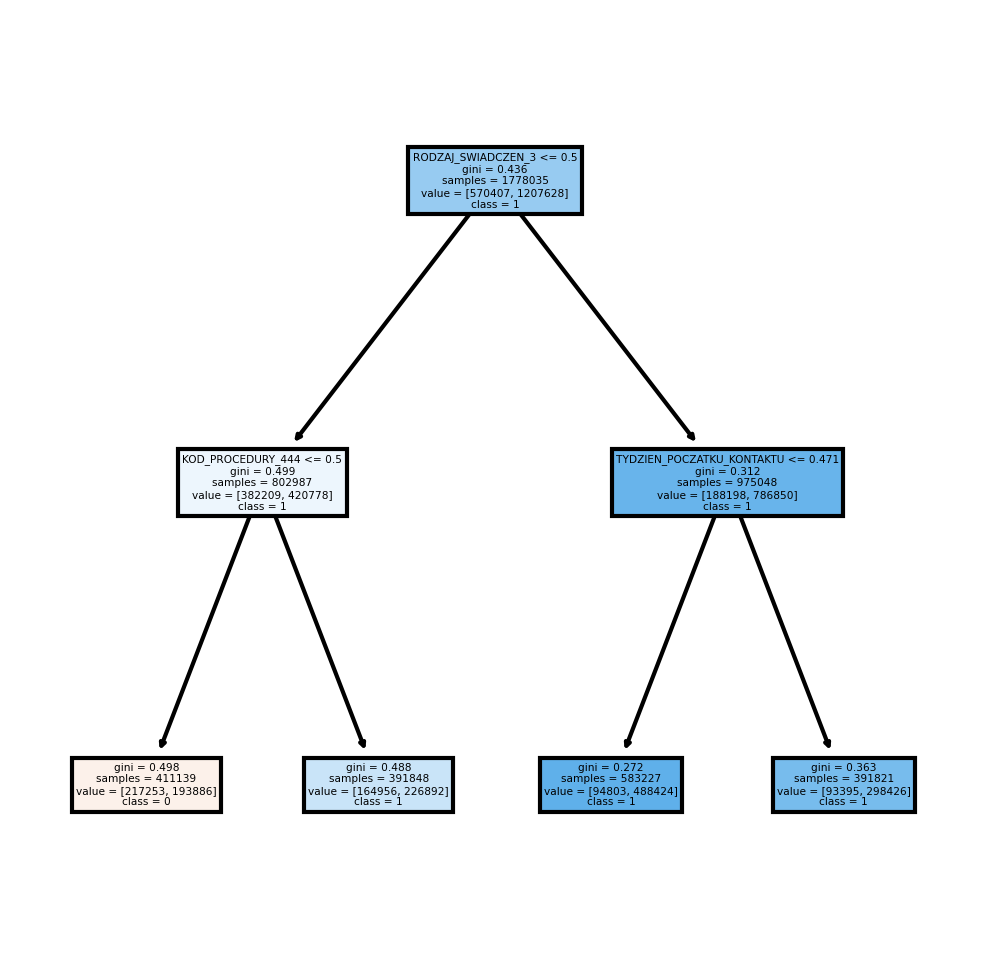

In [520]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree,
               feature_names = list(X.columns), 
               class_names=['0','1'],
               filled = True);

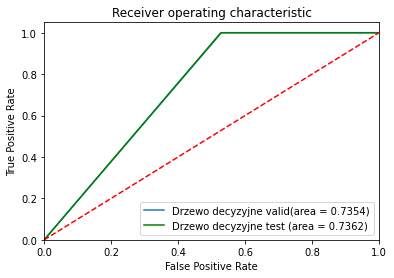

In [521]:
roc_auc_v = roc_auc_score(y_v, thresh_tree_v)
fpr_v, tpr_v, thresholds_v = roc_curve(y_v, thresh_tree_v)

roc_auc_t = roc_auc_score(y_t_t, thresh_tree_t)
fpr_t, tpr_t, thresholds = roc_curve(y_t_t, thresh_tree_t)

plt.figure()
plt.plot(fpr_v, tpr_v, label='Drzewo decyzyjne valid(area = %0.4f)' % roc_auc_v)

plt.plot(fpr_t, tpr_t, label='Drzewo decyzyjne test (area = %0.4f)' % roc_auc_t, color = 'green')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [147]:
# las losowy

In [522]:
# random forest model creation
rfc = RandomForestClassifier(random_state=105)
rfc.fit(X,np.ravel(y))
# predictions
rfc_predict = rfc.predict(X_v)

In [524]:
print('F1 score {}'.format(f1_score(y_v, np.round(rfc_predict), average='macro')))

F1 score 0.26739991350234443


In [528]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_v, rfc_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.3728098778171653

In [527]:
confusion_matrix = confusion_matrix(y_v, rfc_predict)
print(confusion_matrix)

[[155584 271535]
 [   219    135]]


In [14]:

# Number of trees in random forest

In [223]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1,3,5,10,15,20]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5,10,15,20]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               "bootstrap": [True, False],
               "criterion": ["gini", "entropy"]
              }

In [54]:
print(random_grid)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 3, 5, 10, 15, 20, None], 'min_samples_split': [1, 2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5, 10, 15, 20]}


In [224]:
rf = RandomForestClassifier(random_state = 105)

In [226]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, scoring='roc_auc' , verbose=60, n_jobs=1, random_state=105)

print('fit')
rf_random.fit(X, np.ravel(y))

fit
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] n_estimators=157, min_samples_split=2, min_samples_leaf=20, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False 
[CV]  n_estimators=157, min_samples_split=2, min_samples_leaf=20, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False, score=0.633, total= 2.6min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.6min remaining:    0.0s
[CV] n_estimators=157, min_samples_split=2, min_samples_leaf=20, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False 
[CV]  n_estimators=157, min_samples_split=2, min_samples_leaf=20, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False, score=0.645, total= 2.4min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  5.0min remaining:    0.0s
[CV] n_estimators=157, min_samples_split=2, min_samples_leaf=20, max_features=sqrt, max_depth=10, criterion=gini,

C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=73, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=1, criterion=gini, bootstrap=True, score=nan, total=   2.1s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed: 56.5min remaining:    0.0s
[CV] n_estimators=73, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=1, criterion=gini, bootstrap=True 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=73, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=1, criterion=gini, bootstrap=True, score=nan, total=   2.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed: 56.6min remaining:    0.0s
[CV] n_estimators=73, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=1, criterion=gini, bootstrap=True 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=73, min_samples_split=1, min_samples_leaf=10, max_features=sqrt, max_depth=1, criterion=gini, bootstrap=True, score=nan, total=   2.1s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 56.6min remaining:    0.0s
[CV] n_estimators=31, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=31, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini, bootstrap=False, score=nan, total=   2.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed: 56.6min remaining:    0.0s
[CV] n_estimators=31, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=31, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini, bootstrap=False, score=nan, total=   2.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed: 56.7min remaining:    0.0s
[CV] n_estimators=31, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=31, min_samples_split=1, min_samples_leaf=5, max_features=auto, max_depth=15, criterion=gini, bootstrap=False, score=nan, total=   2.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 56.7min remaining:    0.0s
[CV] n_estimators=94, min_samples_split=20, min_samples_leaf=15, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=20, min_samples_leaf=15, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=True, score=0.654, total=  41.4s
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed: 57.4min remaining:    0.0s
[CV] n_estimators=94, min_samples_split=20, min_samples_leaf=15, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=True 
[CV]  n_estimators=94, min_samples_split=20, min_samples_leaf=15, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=True, score=0.611, total=  40.2s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 58.1min remaining:    0.0s
[CV] n_estimators=94, min_samples

C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=94, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=False, score=nan, total=   2.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed: 63.0min remaining:    0.0s
[CV] n_estimators=94, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=94, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=False, score=nan, total=   2.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed: 63.0min remaining:    0.0s
[CV] n_estimators=94, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=94, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=False, score=nan, total=   2.1s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed: 63.0min remaining:    0.0s
[CV] n_estimators=115, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=3, criterion=gini, bootstrap=True 
[CV]  n_estimators=115, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=3, criterion=gini, bootstrap=True, score=0.663, total=  48.1s
[Parallel(n_jobs=1)]: Done  58 out of  58 | elapsed: 63.8min remaining:    0.0s
[CV] n_estimators=115, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=3, criterion=gini, bootstrap=True 
[CV]  n_estimators=115, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=3, criterion=gini, bootstrap=True, score=0.612, total=  47.1s
[Parallel(n_jobs=1)]: Done  59 out of  59 | elapsed: 64.6min remaining:    0.0s
[CV] n_estimators=115, min_samples

C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=10, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=gini, bootstrap=False, score=nan, total=   1.9s
[CV] n_estimators=10, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=gini, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=10, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=gini, bootstrap=False, score=nan, total=   1.9s
[CV] n_estimators=10, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=gini, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=10, min_samples_split=1, min_samples_leaf=10, max_features=auto, max_depth=1, criterion=gini, bootstrap=False, score=nan, total=   1.8s
[CV] n_estimators=178, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=3, criterion=gini, bootstrap=False 
[CV]  n_estimators=178, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=3, criterion=gini, bootstrap=False, score=0.646, total= 1.2min
[CV] n_estimators=178, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=3, criterion=gini, bootstrap=False 
[CV]  n_estimators=178, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=3, criterion=gini, bootstrap=False, score=0.624, total= 1.2min
[CV] n_estimators=178, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=3, criterion=gini, bootstrap=False 
[CV]  n_estimators=178, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=3, criterion=gini, bootstrap=False, sc

C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True, score=nan, total=   2.0s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True, score=nan, total=   1.9s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True, score=nan, total=   1.9s
[CV] n_estimators=115, min_samples_split=20, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False 
[CV]  n_estimators=115, min_samples_split=20, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False, score=0.647, total= 1.8min
[CV] n_estimators=115, min_samples_split=20, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False 
[CV]  n_estimators=115, min_samples_split=20, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False, score=0.640, total= 1.8min
[CV] n_estimators=115, min_samples_split=20, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False 
[CV]  n_estimators=115, min_samples_split=20, min_samples_leaf=15, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=Fal

C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=31, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=False, score=nan, total=   2.1s
[CV] n_estimators=31, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=31, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=False, score=nan, total=   2.0s
[CV] n_estimators=31, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=31, min_samples_split=1, min_samples_leaf=5, max_features=sqrt, max_depth=3, criterion=gini, bootstrap=False, score=nan, total=   2.0s
[CV] n_estimators=94, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=gini, bootstrap=True 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=94, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=gini, bootstrap=True, score=nan, total=   2.1s
[CV] n_estimators=94, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=gini, bootstrap=True 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=94, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=gini, bootstrap=True, score=nan, total=   2.0s
[CV] n_estimators=94, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=gini, bootstrap=True 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=94, min_samples_split=1, min_samples_leaf=1, max_features=sqrt, max_depth=5, criterion=gini, bootstrap=True, score=nan, total=   2.1s
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=None, criterion=gini, bootstrap=False 
[CV]  n_estimators=136, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=None, criterion=gini, bootstrap=False, score=0.632, total= 3.4min
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=None, criterion=gini, bootstrap=False 
[CV]  n_estimators=136, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=None, criterion=gini, bootstrap=False, score=0.664, total= 3.9min
[CV] n_estimators=136, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=None, criterion=gini, bootstrap=False 
[CV]  n_estimators=136, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=None, criterion=gini, bootstrap=False

C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=31, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, bootstrap=False, score=nan, total=   2.1s
[CV] n_estimators=31, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=31, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, bootstrap=False, score=nan, total=   2.1s
[CV] n_estimators=31, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=31, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=10, criterion=entropy, bootstrap=False, score=nan, total=   1.9s
[CV] n_estimators=115, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=gini, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=115, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=gini, bootstrap=False, score=nan, total=   1.9s
[CV] n_estimators=115, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=gini, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=115, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=gini, bootstrap=False, score=nan, total=   2.1s
[CV] n_estimators=115, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=gini, bootstrap=False 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=115, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=15, criterion=gini, bootstrap=False, score=nan, total=   2.0s
[CV] n_estimators=136, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15, criterion=gini, bootstrap=True 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=136, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15, criterion=gini, bootstrap=True, score=nan, total=   2.0s
[CV] n_estimators=136, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15, criterion=gini, bootstrap=True 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=136, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15, criterion=gini, bootstrap=True, score=nan, total=   1.9s
[CV] n_estimators=136, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15, criterion=gini, bootstrap=True 


C:\Python37\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)


[CV]  n_estimators=136, min_samples_split=1, min_samples_leaf=1, max_features=auto, max_depth=15, criterion=gini, bootstrap=True, score=nan, total=   1.9s
[CV] n_estimators=73, min_samples_split=15, min_samples_leaf=20, max_features=auto, max_depth=10, criterion=entropy, bootstrap=True 
[CV]  n_estimators=73, min_samples_split=15, min_samples_leaf=20, max_features=auto, max_depth=10, criterion=entropy, bootstrap=True, score=0.611, total=  57.3s
[CV] n_estimators=73, min_samples_split=15, min_samples_leaf=20, max_features=auto, max_depth=10, criterion=entropy, bootstrap=True 
[CV]  n_estimators=73, min_samples_split=15, min_samples_leaf=20, max_features=auto, max_depth=10, criterion=entropy, bootstrap=True, score=0.656, total=  58.4s
[CV] n_estimators=73, min_samples_split=15, min_samples_leaf=20, max_features=auto, max_depth=10, criterion=entropy, bootstrap=True 
[CV]  n_estimators=73, min_samples_split=15, min_samples_leaf=20, max_features=auto, max_depth=10, criterion=entropy, bootst

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
 pd.DataFrame(rf_random.cv_results_).to_csv('random_forest_random_search.csv')

In [229]:
print('Best Score: ', rf_random.best_score_) 
print('Best Params: ', rf_random.best_params_) 

Best Score:  0.6291908327050777
Best Params:  {'n_estimators': 178, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini', 'bootstrap': False}


In [ ]:
{'n_estimators': 178, 'min_samples_split': 15,
 'min_samples_leaf': 5, 'max_features': 'sqrt',
 'max_depth': 15, 'criterion': 'gini',
 'bootstrap': False}

In [ ]:
'n_estimators': 178, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini', 'bootstrap': False

In [529]:

rfc = RandomForestClassifier(random_state=105,n_estimators= 178, min_samples_split= 15, min_samples_leaf = 5,
                             max_features= 'sqrt', max_depth= 15, criterion= 'gini', bootstrap= False
                            )
rfc.fit(X,np.ravel(y))

rfc_predict = rfc.predict(X_v)

In [530]:
f_score = f1_score(y_v, np.round(rfc_predict), average='macro')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_v, rfc_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [531]:
rfc_predict_test = rfc.predict(X_t_t)

In [532]:
f_score

0.21413826965299484

In [533]:
roc_auc

0.635327625322217

In [534]:
print('F1 score ' +str(f1_score(y_t_t, rfc_predict_test, average='macro')))

F1 score 0.21418438991611255


In [535]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_t_t, rfc_predict_test)
print('AUC :'+str(auc(false_positive_rate, true_positive_rate)))

AUC :0.635364768683274


In [536]:
print('Recall score {}'.format(recall_score(y_t_t, rfc_predict_test, average='macro')))
print('Precision score {}'.format(precision_score(y_t_t, rfc_predict_test, average='macro')))
print('Accuracy score {}'.format(accuracy_score(y_t_t, rfc_predict_test)))

Recall score 0.635364768683274
Precision score 0.5005675987685992
Accuracy score 0.27133346121635465


In [537]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(rfc_predict_test, y_t_t)
pd.DataFrame(confusion_matrix)

,0,1
0,115634,0
1,311486,354


In [538]:
print('Recall score {}'.format(recall_score(y_v, rfc_predict, average='macro')))
print('Precision score {}'.format(precision_score(y_v, rfc_predict, average='macro')))
print('Accuracy score {}'.format(accuracy_score(y_v, rfc_predict)))

Recall score 0.635327625322217
Precision score 0.5005675423492405
Accuracy score 0.2712592374255216


In [539]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(rfc_predict, y_v)
pd.DataFrame(confusion_matrix)

,0,1
0,115602,0
1,311517,354


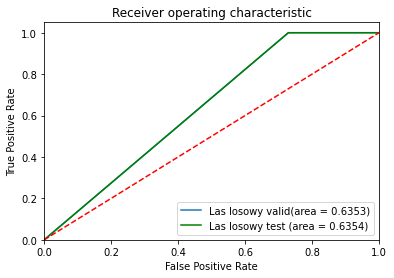

In [540]:
roc_auc_v = roc_auc_score(y_v, rfc_predict)
fpr_v, tpr_v, thresholds_v = roc_curve(y_v, rfc_predict)

roc_auc_t = roc_auc_score(y_t_t, rfc_predict_test)
fpr_t, tpr_t, thresholds = roc_curve(y_t_t, rfc_predict_test)

plt.figure()
plt.plot(fpr_v, tpr_v, label='Las losowy valid(area = %0.4f)' % roc_auc_v)

plt.plot(fpr_t, tpr_t, label='Las losowy test (area = %0.4f)' % roc_auc_t, color = 'green')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [130]:
#svm

In [541]:
clf = linear_model.SGDClassifier(loss="hinge", penalty="l2", max_iter=100, n_jobs=-1, random_state = 105)

In [542]:
clf.fit(X, np.ravel(y))

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=105, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [543]:
sdg_svm_pred = clf.predict(X_v)

In [544]:

f_score = f1_score(y_v, np.round(sdg_svm_pred), average='macro')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_v, sdg_svm_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [545]:
roc_auc 

0.6852645281525758

In [546]:
f_score

0.2716679787382526

In [362]:
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [ 0.001, 0.01, 0.1, 1, 10] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
eta0 = [0.1, 0.5 ,1, 10] 

In [ ]:
grid_search = pd.DataFrame(columns=['penalty','alpha','learning_rate','eta0', 'threshold','AUC','f1'])

In [380]:
grid_search  = pd.DataFrame({'penalty':0,'alpha': 0,'learning_rate':0,'eta0':0,
                                  'threshold':0,'AUC':0,'f1':0}, index=[0])

In [382]:
for a in  penalty:
    for b in alpha:
        for c in learning_rate:
            for d in eta0:
                clf = linear_model.SGDClassifier(penalty= a, loss= 'hinge', learning_rate= c,
                                                 eta0 = d, class_weight =  'balanced', alpha= b, random_state = 105)
                clf.fit(X, np.ravel(y))

                from sklearn.calibration import CalibratedClassifierCV
                calibrator = CalibratedClassifierCV(clf, cv='prefit')
                model=calibrator.fit(X, np.ravel(y))


                y_test_pred = model.predict_proba(X_v)

                predicted7 = y_test_pred[:,1] 
                for j in range(10,100,5):
                    print((j/100))
                    cos7 = []
                    for i in predicted7:
                        if i >= (j/100):
                            cos7.append(1)
                        else:
                            cos7.append(0)
                    auc_score = roc_auc_score(y_v, cos7)
                    f1_scores = f1_score(y_v, np.round(cos7), average='macro')
                    #print('Accuracy score {}'.format(accuracy_score(y_v, np.round(cos7))))
                    grid_search  = grid_search.append(pd.DataFrame({'penalty':a,'alpha': b,'learning_rate':c,'eta0':d,
                                  'threshold':j/100,'AUC':auc_score,'f1':f1_scores}, index=[0]), ignore_index=True)

0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0

In [383]:
grid_search.to_csv('SGD_svm_grid_moj.csv')

In [387]:
grid_search[grid_search['AUC']==max(grid_search['AUC'])]

,penalty,alpha,learning_rate,eta0,threshold,AUC,f1
1652,l2,0.001,invscaling,10.0,0.75,0.787637,0.383877


In [547]:
clf = linear_model.SGDClassifier(penalty= 'l2', loss= 'hinge', learning_rate= 'invscaling',
                                                 eta0 = 10, class_weight =  'balanced', alpha= 0.001, random_state = 105)
clf.fit(X, np.ravel(y))

SGDClassifier(alpha=0.001, average=False, class_weight='balanced',
              early_stopping=False, epsilon=0.1, eta0=10, fit_intercept=True,
              l1_ratio=0.15, learning_rate='invscaling', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=105, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [548]:
from sklearn.calibration import CalibratedClassifierCV
calibrator = CalibratedClassifierCV(clf, cv='prefit')
model=calibrator.fit(X, np.ravel(y))

In [550]:
y_pred_v = model.predict_proba(X_v)

predicted7 = y_pred_v[:,1]
thresh_svm_sgd_v = []
for i in predicted7:
    if i >= 0.75:
        thresh_svm_sgd_v.append(1)
    else:
        thresh_svm_sgd_v.append(0)

In [551]:
y_pred_t = model.predict_proba(X_t_t)
predicted8 = y_pred_t[:,1] 

thresh_svm_sgd_t = []
for i in predicted8:
    if i >= 0.75:
        thresh_svm_sgd_t.append(1)
    else:
        thresh_svm_sgd_t.append(0)

In [552]:
#test

In [553]:
print('Recall score '+str(metrics.recall_score(y_t_t, np.round(thresh_svm_sgd_t))))
print('Precision score {}'.format(precision_score(y_t_t, np.round(thresh_svm_sgd_t), average='macro')))
print('Accuracy score {}'.format(accuracy_score(y_t_t, np.round(thresh_svm_sgd_t))))
print('f1 score '+str(f1_score(y_t_t, np.round(thresh_svm_sgd_t), average='macro')))
print('AUC score '+str(metrics.roc_auc_score(y_t_t, np.round(thresh_svm_sgd_t))))

Recall score 0.9293785310734464
Precision score 0.5009598788138749
Accuracy score 0.6186434730533319
f1 score 0.38409663835058644
AUC score 0.7738822323844474


In [554]:
from sklearn.metrics import confusion_matrix
confusion_matrix_svm_v = confusion_matrix(y_t_t, np.round(thresh_svm_sgd_t))
pd.DataFrame(confusion_matrix_svm_v)

,0,1
0,264125,162995
1,25,329


In [555]:
# valid

In [556]:
print('Recall score '+str(metrics.recall_score(y_v, thresh_svm_sgd_v)))
print('Precision score {}'.format(precision_score(y_v, thresh_svm_sgd_v, average='macro')))
print('Accuracy score {}'.format(accuracy_score(y_v, thresh_svm_sgd_v)))
print('f1 score '+str(f1_score(y_v, np.round(thresh_svm_sgd_v), average='macro')))
print('AUC score '+str(metrics.roc_auc_score(y_v, thresh_svm_sgd_v)))

Recall score 0.9576271186440678
Precision score 0.5010073253072203
Accuracy score 0.6179290855796741
f1 score 0.38387711231191146
AUC score 0.7876373297466697


In [557]:
from sklearn.metrics import confusion_matrix
confusion_matrix_svm_t = confusion_matrix(y_v, np.round(thresh_svm_sgd_v))
pd.DataFrame(confusion_matrix_svm_t)

,0,1
0,263809,163310
1,15,339


In [558]:
# roc

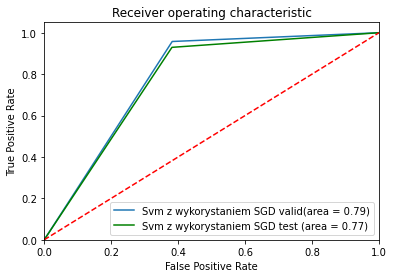

In [559]:
roc_auc_v = roc_auc_score(y_v, thresh_svm_sgd_v)
fpr_v, tpr_v, thresholds_v = roc_curve(y_v, thresh_svm_sgd_v)

roc_auc_t = roc_auc_score(y_t_t, thresh_svm_sgd_t)
fpr_t, tpr_t, thresholds = roc_curve(y_t_t, thresh_svm_sgd_t)

plt.figure()
plt.plot(fpr_v, tpr_v, label='Svm z wykorystaniem SGD valid(area = %0.2f)' % roc_auc_v)

plt.plot(fpr_t, tpr_t, label='Svm z wykorystaniem SGD test (area = %0.2f)' % roc_auc_t, color = 'green')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()      

Sieć neuronowa

In [560]:
clf_neur = MLPClassifier(solver='adam', alpha=1e-5,
                     hidden_layer_sizes=(2,5), random_state=105)

In [561]:
clf_neur.fit(X, np.ravel(y))

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=105, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [562]:
pred_neur = clf_neur.predict(X_v)

In [563]:
metrics.roc_auc_score(y_v, pred_neur)

0.607694811047975

In [564]:
confusion_matrix = confusion_matrix(y_v, pred_neur)
print(confusion_matrix)

[[ 91997 335122]
 [     0    354]]


In [ ]:
# tuning hiperparametrów i thresholdu

In [432]:
hidden_layer_sizes= [(10,30,10),(20,),(2,5,2), (5,10,10,5)]
activation= ['identity', 'logistic', 'tanh', 'relu']
solver=[ 'adam']
alpha= [0.0001, 0.05,0.005]
learning_rate= ['invscaling','adaptive']

In [ ]:
grid_search_neuron = pd.DataFrame(columns=['hidden_layer_sizes','activation','alpha','learning_rate', 'threshold','AUC','f1'])

In [435]:
grid_search_neuron  = pd.DataFrame({'hidden_layer_sizes':0,'activation': 0,'alpha':0,'learning_rate':0,
                                  'threshold':0,'AUC':0,'f1':0}, index=[0])

In [439]:
for a in  hidden_layer_sizes:
    for b in activation:
        for c in alpha:
            for d in learning_rate:
                clf_neur = MLPClassifier(hidden_layer_sizes = a, activation=b, alpha=c ,learning_rate= d, random_state=105)
                clf_neur.fit(X, np.ravel(y))

                y_test_pred = clf_neur.predict_proba(X_v)[:,1]

                predicted_neur = y_test_pred  
                for j in range(10,100,5):
                    print((j/100))
                    cos_neur = []
                    for i in predicted_neur:
                        if i >= (j/100):
                            cos_neur.append(1)
                        else:
                            cos_neur.append(0)
                    auc_score = roc_auc_score(y_v, cos_neur)
                    f1_scores = f1_score(y_v, np.round(cos_neur), average='macro')
                    #print(pd.DataFrame({'hidden_layer_sizes':a,'activation': b,'alpha':c,'learning_rate':d,
                    #              'threshold':j/100,'AUC':auc_score,'f1':f1_scores}))
                    #print('Accuracy score {}'.format(accuracy_score(y_v, np.round(cos7))))
                    grid_search_neuron  = grid_search_neuron.append(pd.DataFrame({'hidden_layer_sizes':str(a),'activation': b,'alpha':c,'learning_rate':d,
                                  'threshold':j/100,'AUC':auc_score,'f1':f1_scores}, index=[0]), ignore_index=True)

0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


C:\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


C:\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
0.1
0.15
0.2
0.25
0.3
0.35
0

In [440]:
grid_search_neuron.to_csv('grid_search_neuron.csv')

In [442]:
grid_search_neuron[grid_search_neuron['AUC']==max(grid_search_neuron['AUC'])]

,hidden_layer_sizes,activation,alpha,learning_rate,threshold,AUC,f1
53,"(10, 30, 10)",identity,0.05,invscaling,0.9,0.867288,0.427555
71,"(10, 30, 10)",identity,0.05,adaptive,0.9,0.867288,0.427555


In [443]:
grid_search_neuron[grid_search_neuron['f1']==max(grid_search_neuron['f1'])]

,hidden_layer_sizes,activation,alpha,learning_rate,threshold,AUC,f1
54,"(10, 30, 10)",identity,0.05,invscaling,0.95,0.661285,0.470716
72,"(10, 30, 10)",identity,0.05,adaptive,0.95,0.661285,0.470716


In [565]:
clf_neur = MLPClassifier(hidden_layer_sizes = (10, 30, 10), activation='identity', alpha=0.05 ,learning_rate= 'invscaling', random_state=105)
clf_neur.fit(X, np.ravel(y))

MLPClassifier(activation='identity', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 30, 10), learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=105, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [566]:
# valid

In [567]:
y_pred_neur_v = clf_neur.predict_proba(X_v)[:,1]

predicted_neur = y_pred_neur_v

thresh_neur_v = []
for i in predicted_neur:
    if i >= 0.9:
        thresh_neur_v.append(1)
    else:
        thresh_neur_v.append(0)

In [568]:
print('Recall score {}'.format(recall_score(y_v, np.round(thresh_neur_v), average='macro')))
print('Precision score {}'.format(precision_score(y_v, np.round(thresh_neur_v), average='macro')))
print('Accuracy score {}'.format(accuracy_score(y_v, np.round(thresh_neur_v))))
print('F1 score {}'.format(f1_score(y_v, np.round(thresh_neur_v), average='macro')))
print('AUC score {}'.format(roc_auc_score(y_v, np.round(thresh_neur_v))))

Recall score 0.8672880967043639
Precision score 0.5015671061654609
Accuracy score 0.7376161769281335
F1 score 0.427554629012551
AUC score 0.8672880967043638


In [569]:
from sklearn.metrics import confusion_matrix
confusion_matrix_neur_v = confusion_matrix(y_v, np.round(thresh_neur_v))
pd.DataFrame(confusion_matrix_neur_v)

,0,1
0,314958,112161
1,1,353


In [ ]:
# test 

In [570]:
y_pred_t = clf_neur.predict_proba(X_t_t)[:,1]

predicted_neur_t = y_pred_t

thresh_neur_t = []
for i in predicted_neur_t:
    if i >= 0.9:
        thresh_neur_t.append(1)
    else:
        thresh_neur_t.append(0)

In [571]:
print('Recall score {}'.format(recall_score(y_t_t, np.round(thresh_neur_t), average='macro')))
print('Precision score {}'.format(precision_score(y_t_t, np.round(thresh_neur_t), average='macro')))
print('Accuracy score {}'.format(accuracy_score(y_t_t, np.round(thresh_neur_t))))
print('F1 score {}'.format(f1_score(y_t_t, np.round(thresh_neur_t), average='macro')))
print('AUC score {}'.format(roc_auc_score(y_t_t, np.round(thresh_neur_t))))

Recall score 0.8632056392942669
Precision score 0.5015508831513237
Accuracy score 0.7379185634681875
F1 score 0.4276326142526417
AUC score 0.8632056392942669


In [572]:
from sklearn.metrics import confusion_matrix
confusion_matrix_neur_t = confusion_matrix(y_t_t, np.round(thresh_neur_t))
pd.DataFrame(confusion_matrix_neur_t)

,0,1
0,315091,112029
1,4,350


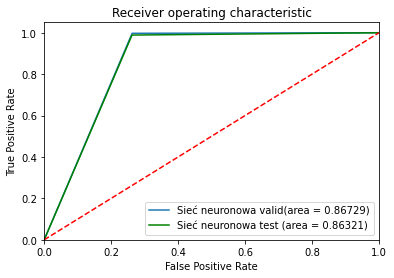

In [573]:
roc_auc_v = roc_auc_score( y_v, np.round(thresh_neur_v))

fpr_v, tpr_v, thresholds_v = roc_curve(y_v, np.round(thresh_neur_v))

roc_auc_t = roc_auc_score( y_t_t, np.round(thresh_neur_t))
fpr_t, tpr_t, thresholds = roc_curve( y_t_t, np.round(thresh_neur_t))

plt.figure()
plt.plot(fpr_v, tpr_v, label='Sieć neuronowa valid(area = %0.5f)' % roc_auc_v)

plt.plot(fpr_t, tpr_t, label='Sieć neuronowa test (area = %0.5f)' % roc_auc_t, color = 'green')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()  

In [574]:
# ROC wszystkie algorytmy

In [ ]:
# valid

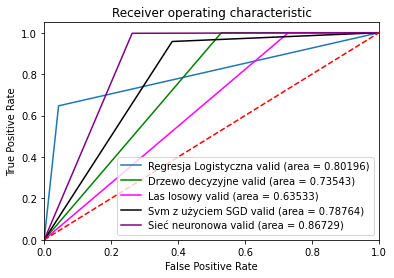

In [576]:
roc_auc_log = roc_auc_score( y_v, np.round(thresh_log_v))
fpr_log, tpr_log, thresholds_log = roc_curve(y_v, np.round(thresh_log_v))

roc_auc_tree = roc_auc_score( y_v, np.round(thresh_tree_v))
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_v, np.round(thresh_tree_v))

roc_auc_rf = roc_auc_score( y_v, np.round(rfc_predict))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_v, np.round(rfc_predict))

roc_auc_svm_sgd = roc_auc_score( y_v, np.round(thresh_svm_sgd_v))
fpr_svm_sgd, tpr_svm_sgd, thresholds_svm_sgd = roc_curve(y_v, np.round(thresh_svm_sgd_v))

roc_auc_neur = roc_auc_score( y_v, np.round(thresh_neur_v))
fpr_neur, tpr_neur, thresholds_neur = roc_curve(y_v, np.round(thresh_neur_v))




plt.figure()
plt.plot(fpr_log, tpr_log, label='Regresja Logistyczna valid (area = %0.5f)' % roc_auc_log)

plt.plot(fpr_tree, tpr_tree, label='Drzewo decyzyjne valid (area = %0.5f)' % roc_auc_tree, color = 'green')

plt.plot(fpr_rf, tpr_rf, label='Las losowy valid (area = %0.5f)' % roc_auc_rf, color = 'magenta')

plt.plot(fpr_svm_sgd, tpr_svm_sgd, label='Svm z użyciem SGD valid (area = %0.5f)' % roc_auc_svm_sgd, color = 'black')

plt.plot(fpr_neur, tpr_neur, label='Sieć neuronowa valid (area = %0.5f)' % roc_auc_neur, color = 'purple')



plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()  

In [59]:
# test

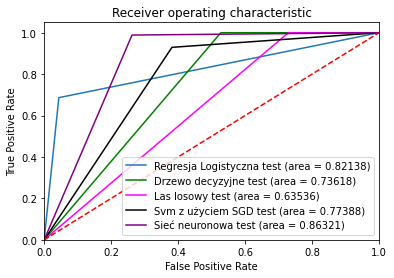

In [579]:
roc_auc_log = roc_auc_score( y_t_t, np.round(thresh_log_t))
fpr_log, tpr_log, thresholds_log = roc_curve(y_t_t, np.round(thresh_log_t))

roc_auc_tree = roc_auc_score( y_t_t, np.round(thresh_tree_t))
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_t_t, np.round(thresh_tree_t))

roc_auc_rf = roc_auc_score( y_t_t, np.round(rfc_predict_test))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_t_t, np.round(rfc_predict_test))

roc_auc_svm_sgd = roc_auc_score( y_t_t, np.round(thresh_svm_sgd_t))
fpr_svm_sgd, tpr_svm_sgd, thresholds_svm_sgd = roc_curve(y_t_t, np.round(thresh_svm_sgd_t))

roc_auc_neur = roc_auc_score( y_t_t, np.round(thresh_neur_t))
fpr_neur, tpr_neur, thresholds_neur = roc_curve(y_t_t, np.round(thresh_neur_t))




plt.figure()
plt.plot(fpr_log, tpr_log, label='Regresja Logistyczna test (area = %0.5f)' % roc_auc_log)

plt.plot(fpr_tree, tpr_tree, label='Drzewo decyzyjne test (area = %0.5f)' % roc_auc_tree, color = 'green')

plt.plot(fpr_rf, tpr_rf, label='Las losowy test (area = %0.5f)' % roc_auc_rf, color = 'magenta')

plt.plot(fpr_svm_sgd, tpr_svm_sgd, label='Svm z użyciem SGD test (area = %0.5f)' % roc_auc_svm_sgd, color = 'black')

plt.plot(fpr_neur, tpr_neur, label='Sieć neuronowa test (area = %0.5f)' % roc_auc_neur, color = 'purple')



plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()  